# VAERS DATA 2017-2023: Market Basket Analysis and KMeans Clustering of Pediatric Vaccine AEFI Symptom Reports




### VAERS DATA2019 Features




| Header        | Type (Max characters or format) | VAERS 2 Form | VAERS 1 Form | Description of Contents                              |
|---------------|---------------------------------|--------------|--------------|-----------------------------------------------------|
| VAERS_ID      | Num (7)                         | Not derived  | Not derived  | VAERS identification number                          |
| RECVDATE      | Date                            | Not derived  | Not derived  | Date report was received                             |
| STATE         | Char (2)                        | Derived      | Box 1        | State                                               |
| AGE_YRS       | Num (xxx.x)                     | Item 6       | Box 4        | Age in years                                        |
| CAGE_YR       | Num (xxx)                       | Derived      | Derived      | Calculated age of patient in years                  |
| CAGE_MO       | Num (x.x)                       | Derived      | Derived      | Calculated age of patient in months                 |
| SEX           | Char (1)                        | Item 3       | Box 5        | Sex                                                 |
| RPT_DATE      | Date                            | Discontinued | Box 6        | Date form completed                                |
| SYMPTOM_TEXT  | Char (32,000)                   | Item 18      | Box 7        | Reported symptom text                              |
| DIED          | Char (1)                        | Item 21      | Box 8        | Died                                                |
| DATEDIED      | Date                            | Item 21      | Box 8        | Date of death                                       |
| L_THREAT      | Char (1)                        | Item 21      | Box 8        | Life-threatening illness                           |
| ER_VISIT      | Char (1)                        | Discontinued | Box 8        | Emergency room or doctor visit                     |
| HOSPITAL      | Char (1)                        | Item 21      | Box 8        | Hospitalized                                       |
| HOSPDAYS      | Num (3)                         | Item 21      | Box 8        | Number of days hospitalized                        |
| X_STAY        | Char (1)                        | Item 21      | Box 8        | Prolongation of existing hospitalization            |
| DISABLE       | Char (1)                        | Item 21      | Box 8        | Disability                                         |
| RECOVD        | Char (1)                        | Item 20      | Box 9        | Recovered                                          |
| VAX_DATE      | Date                            | Item 4       | Box 10       | Vaccination date                                   |
| ONSET_DATE    | Date                            | Item 5       | Box 11       | Adverse event onset date                           |
| NUMDAYS       | Num (5)                         | Derived      | Derived      | Number of days (onset date – vaccination date)      |
| LAB_DATA      | Char (32,000)                   | Item 19      | Box 12       | Diagnostic laboratory data                         |
| V_ADMINBY     | Char (3)                        | Item 16      | Box 15       | Type of facility where vaccine was administered    |
| V_FUNDBY      | Char (3)                        | Discontinued | Box 16       | Type of funds used to purchase vaccines            |
| OTHER_MEDS    | Char (240)                      | Item 9       | Box 17       | Other medications                                 |
| CUR_ILL       | Char (32,000)                   | Item 11      | Box 18       | Illnesses at time of vaccination                    |
| HISTORY       | Char (32,000)                   | Item 12      | Box 19       | Chronic or long-standing health conditions         |
| PRIOR_VAX     | Char (32,000)                   | Item 23      | Box 21       | Prior vaccination event information                 |
| SPLITYPE      | Char (32,000)                   | Item 26      | Box 24       | Manufacturer information                           |
| FORM_VERS     | Char (32,000)                   | Not derived  | Not derived  | VAERS form version 1 or 2                           |
| TODAYS_DATE   | Char (32,000)                   | Item 7       | Does not exist | Date form completed                                |
| BIRTH_DEFECT  | Char (32,000)                   | Item 21      | Does not exist | Congenital anomaly or birth defect                  |
| OFC_VISIT     | Char (32,000)                   | Item 21      | Does not exist | Office/clinic visit                                |
| ER_ED_VISIT   | Char (32,000)                   | Item 21      | Does not exist | Emergency department/room, or urgent care           |
| ALLERGIES     | Char (32,000)                   | Item 10      | Does not exist | Allergies to medications, food, or other products   |

Note: This codebook encompasses all unsupervised learning analysis that was refined and performed for pediatric VAERS reports. Other codebooks were used to develop this final codebook.

### Imports

In [ ]:
#Import packages
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)

import nltk
nltk.download('punkt')

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Imports
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 10)

from collections import Counter

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams['figure.figsize'] = (12, 10)

In [ ]:
#helper functions
def get_predictions(predictions_proba, threshold=0.5):
  predictions = np.where(predictions_proba <= threshold, 0, 1)
  return predictions

#Function that calculates and print metrics
def show_metrics(testy, predictions):
  print('====================')
  accuracy = accuracy_score(testy, predictions)
  print('Accuracy: %.3f' % accuracy)
  recall = recall_score(testy, predictions)
  print('Recall: %.3f' % recall)
  precision = precision_score(testy, predictions)
  print('Precision: %.3f' % precision)
  f1 = f1_score(testy, predictions)
  print('F1: %.3f' % f1)
  print('====================')

#Function to plot ROC Curve
def plot_roc(testy, predictions, title):
    fpr, tpr, thresholds = roc_curve(testy, predictions)
    roc_auc = auc(fpr, tpr)
    print('AUROC: %.3f' % roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

#Function to plot PR Curve
def plot_prc(testy, predictions, title):
    precision, recall, thresholds = precision_recall_curve(testy, predictions)
    auc_score = auc(recall, precision)
    plt.plot(recall,precision, label='PR curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--' )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0, 1.02])
    plt.ylim([0, 1.02])
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

#Function to plot precision and recall vs all tresholds
def plot_prec_recall_vs_thresh(testy, predictions, title):
    precision, recall, thresholds = precision_recall_curve(testy, predictions)
    plt.plot(thresholds, precision[:-1], 'b--', label='precision')
    plt.plot(thresholds, recall[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.ylim([0,1])
    plt.legend(loc="lower right")
    plt.title(title)
    plt.show()

### Market-Basket Analysis

#### Age Subsets and Data Cleaning

In [ ]:
# cleaned_df is non-one-hot-encoded and no TF-IDF but cleaned data

# Read in the dataset
data_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/cleaned_NoFilter_data.csv"
cleaned_df = pd.read_csv(data_file,  encoding='ISO-8859-1')

# create dataframe with DATA2019 dataset
cleaned_df = pd.DataFrame(cleaned_df)

In [ ]:
# visual first few rows and features of cleaned_df
cleaned_df.head()

VAERS_ID  AGE_YRS  SEX                                       SYMPTOM_TEXT  \
0    676017     1.50    0  After getting Hep A vaccination on 12/20, went...   
1    676017     1.50    0  After getting Hep A vaccination on 12/20, went...   
2    676017     1.50    0  After getting Hep A vaccination on 12/20, went...   
3    676024     1.58    1  Brought her to Dr's office for respiratory ill...   
4    676024     1.58    1  Brought her to Dr's office for respiratory ill...   

   DIED  L_THREAT  ER_VISIT  HOSPITAL  HOSPDAYS  X_STAY  ...  ER_ED_VISIT  \
0     0         0         1         1       3.0       0  ...            N   
1     0         0         1         1       3.0       0  ...            N   
2     0         0         1         1       3.0       0  ...            N   
3     0         1         1         1      21.0       0  ...            N   
4     0         1         1         1      21.0       0  ...            N   

   ALLERGIES    SYMPTOM1                   SYMPTOM2          SYMPTOM3  \
0       nkda      Abasia        Arthritis infective  Aspiration joint   
1       nkda  Blood test         C-reactive protein  Gait disturbance   
2       nkda     Surgery            Ultrasound scan             X-ray   
3       nkda  Blood test  Bronchial hyperreactivity      Bronchoscopy   
4       nkda  Blood test  Bronchial hyperreactivity      Bronchoscopy   

                  SYMPTOM4                           SYMPTOM5 VAX_TYPE  \
0      Bacterial infection            Bacterial test positive     HEPA   
1  Injection site swelling  Red blood cell sedimentation rate     HEPA   
2                      NaN                                NaN     HEPA   
3          Cardiac failure              Computerised tomogram     HEPA   
4          Cardiac failure              Computerised tomogram      MMR   

                             VAX_NAME AGE_BUCKET  
0                       HEP A (VAQTA)    toddler  
1                       HEP A (VAQTA)    toddler  
2                       HEP A (VAQTA)    toddler  
3                      HEP A (HAVRIX)    toddler  
4  MEASLES + MUMPS + RUBELLA (MMR II)    toddler  

[5 rows x 31 columns]

In [ ]:
# assigning data of cleaned_df to test dataframe to not overwrite original dataframe
test_df = cleaned_df
test_df.head()

VAERS_ID  AGE_YRS  SEX                                       SYMPTOM_TEXT  \
0    676017     1.50    0  After getting Hep A vaccination on 12/20, went...   
1    676017     1.50    0  After getting Hep A vaccination on 12/20, went...   
2    676017     1.50    0  After getting Hep A vaccination on 12/20, went...   
3    676024     1.58    1  Brought her to Dr's office for respiratory ill...   
4    676024     1.58    1  Brought her to Dr's office for respiratory ill...   

   DIED  L_THREAT  ER_VISIT  HOSPITAL  HOSPDAYS  X_STAY  ...  ER_ED_VISIT  \
0     0         0         1         1       3.0       0  ...            N   
1     0         0         1         1       3.0       0  ...            N   
2     0         0         1         1       3.0       0  ...            N   
3     0         1         1         1      21.0       0  ...            N   
4     0         1         1         1      21.0       0  ...            N   

   ALLERGIES    SYMPTOM1                   SYMPTOM2          SYMPTOM3  \
0       nkda      Abasia        Arthritis infective  Aspiration joint   
1       nkda  Blood test         C-reactive protein  Gait disturbance   
2       nkda     Surgery            Ultrasound scan             X-ray   
3       nkda  Blood test  Bronchial hyperreactivity      Bronchoscopy   
4       nkda  Blood test  Bronchial hyperreactivity      Bronchoscopy   

                  SYMPTOM4                           SYMPTOM5 VAX_TYPE  \
0      Bacterial infection            Bacterial test positive     HEPA   
1  Injection site swelling  Red blood cell sedimentation rate     HEPA   
2                      NaN                                NaN     HEPA   
3          Cardiac failure              Computerised tomogram     HEPA   
4          Cardiac failure              Computerised tomogram      MMR   

                             VAX_NAME AGE_BUCKET  
0                       HEP A (VAQTA)    toddler  
1                       HEP A (VAQTA)    toddler  
2                       HEP A (VAQTA)    toddler  
3                      HEP A (HAVRIX)    toddler  
4  MEASLES + MUMPS + RUBELLA (MMR II)    toddler  

[5 rows x 31 columns]

In [ ]:
# changing all symptoms to be lower case so that unique values can be found
test_df['SYMPTOM1'] = test_df['SYMPTOM1'].astype(str)
test_df['SYMPTOM2'] = test_df['SYMPTOM2'].astype(str)
test_df['SYMPTOM3'] = test_df['SYMPTOM3'].astype(str)
test_df['SYMPTOM4'] = test_df['SYMPTOM4'].astype(str)
test_df['SYMPTOM5'] = test_df['SYMPTOM5'].astype(str)

test_df['SYMPTOM1'] = test_df['SYMPTOM1'].apply(str.lower)
test_df['SYMPTOM2'] = test_df['SYMPTOM2'].apply(str.lower)
test_df['SYMPTOM3'] = test_df['SYMPTOM3'].apply(str.lower)
test_df['SYMPTOM4'] = test_df['SYMPTOM4'].apply(str.lower)
test_df['SYMPTOM5'] = test_df['SYMPTOM5'].apply(str.lower)

##### Neonate

In [ ]:
# Select only pediatric patients by age bucket and subset
neonate_subset = test_df[test_df['AGE_BUCKET'] == 'neonate']

In [ ]:
# Calculate the total number of rows in the DataFrame
total_rows = len(neonate_subset)

# Calculate the number of hospital visits with value 0
hosp_0_count = neonate_subset['HOSPITAL'].value_counts().get(0, 0)  # If 0 is not present, return 0

# Calculate the number of hospital visits with value 1
hosp_1_count = neonate_subset['HOSPITAL'].value_counts().get(1, 0)  # If 1 is not present, return 0

# Calculate the percentage of hospital visits with value 0
hosp_0_percentage = (hosp_0_count / total_rows) * 100

# Calculate the percentage of hospital visits with value 1
hosp_1_percentage = (hosp_1_count / total_rows) * 100

# Display the results
print("Percentage of hospital visits with HOSP value 0: {:.2f}%".format(hosp_0_percentage))
print("Percentage of hospital visits with HOSP value 1: {:.2f}%".format(hosp_1_percentage))

Percentage of hospital visits with HOSP value 0: 75.00%
Percentage of hospital visits with HOSP value 1: 25.00%


In [ ]:
# Standard Deviation of Neonate age (years)
neonate_subset['AGE_YRS'].std()

0.0

In [ ]:
# Count of each sex in neonates
neonate_subset['SEX'].value_counts()

0    112
1    104
Name: SEX, dtype: int64

In [ ]:
# Number of neonate reports and dataframe subset shape
neonate_subset.shape

(216, 31)

In [ ]:
# Vaccine type counts
neonate_subset['VAX_TYPE'].value_counts()

HEPB         128
DTAP          14
FLU(H1N1)     10
MMR           10
PNC            9
TDAP           8
RV             8
VARCEL         7
HIB            6
UNK            5
HEPA           4
IPV            2
PPV            2
MEN            2
HPV            1
Name: VAX_TYPE, dtype: int64

In [ ]:
# Filter the DataFrame to get rows where VAX_TYPE is "HEPB"
hepb_subset = neonate_subset[neonate_subset['VAX_TYPE'] == "HEPB"]

# Count the occurrences of each sex (0 or 1) in the filtered subset
sex_counts = hepb_subset['SEX'].value_counts()

print(sex_counts)

1    65
0    63
Name: SEX, dtype: int64


In [ ]:
# Create unique set of symptoms from symptom column 1 of neonate subset
set_neonate1 = set(neonate_subset['SYMPTOM1'])

In [ ]:
len(set_neonate1)

115

In [ ]:
# Create unique set of symptoms for all symptom columns
set_neonate2 = set(neonate_subset['SYMPTOM2'])
set_neonate3 = set(neonate_subset['SYMPTOM3'])
set_neonate4 = set(neonate_subset['SYMPTOM4'])
set_neonate5 = set(neonate_subset['SYMPTOM5'])

In [ ]:
# Find total number of unqiue symptoms for neonates
total_len_neonate = len(set_neonate1)+len(set_neonate2)+len(set_neonate3)+len(set_neonate4)+len(set_neonate5)
print(total_len_neonate)

424


In [ ]:
# Find frequency of symptoms for all neonates using sets above
from collections import Counter

neonate_symptoms = []

neonate_symptoms.extend(set_neonate1)
neonate_symptoms.extend(set_neonate2)
neonate_symptoms.extend(set_neonate3)
neonate_symptoms.extend(set_neonate4)
neonate_symptoms.extend(set_neonate5)

counter = Counter(neonate_symptoms)

# Get the most common unique values
most_common = counter.most_common()

print(most_common)


[('lethargy', 5), ('vomiting', 5), ('eczema', 4), ('pyrexia', 4), ('autism spectrum disorder', 4), ('screaming', 4), ('unresponsive to stimuli', 4), ('cyanosis', 4), ('rash', 4), ('respiratory arrest', 4), ('nan', 4), ('inflammation', 3), ('gastrooesophageal reflux disease', 3), ('blood test normal', 3), ('diarrhoea', 3), ('condition aggravated', 3), ('pain', 3), ('hypotonia', 3), ('urine analysis normal', 3), ('generalised tonic-clonic seizure', 3), ('electroencephalogram normal', 3), ('wrong drug administered', 3), ('asthenia', 3), ('erythema', 3), ('skin discolouration', 3), ('diet refusal', 3), ('urticaria', 3), ('poor feeding infant', 3), ('lumbar puncture', 3), ('intensive care', 3), ('crying', 2), ('rash erythematous', 2), ('sleep apnoea syndrome', 2), ('product storage error', 2), ('decreased appetite', 2), ('ultrasound skull', 2), ('muscle twitching', 2), ('pallor', 2), ('full blood count', 2), ('platelet count increased', 2), ('echocardiogram', 2), ('product administered to p

In [ ]:
# Replacing irrelevant conditions captured in 'symptoms'

# Autism Spectrum Disorder
neonate_subset['SYMPTOM1'].replace(['autism spectrum disorder'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM2'].replace(['autism spectrum disorder'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM3'].replace(['autism spectrum disorder'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM4'].replace(['autism spectrum disorder'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM5'].replace(['autism spectrum disorder'], 'no adverse event', inplace=True)

# Lumbar Puncture
neonate_subset['SYMPTOM1'].replace(['lumbar puncture'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM2'].replace(['lumbar puncture'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM3'].replace(['lumbar puncture'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM4'].replace(['lumbar puncture'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM5'].replace(['lumbar puncture'], 'no adverse event', inplace=True)

# Intensive Care
neonate_subset['SYMPTOM1'].replace(['intensive care'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM2'].replace(['intensive care'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM3'].replace(['intensive care'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM4'].replace(['intensive care'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM5'].replace(['intensive care'], 'no adverse event', inplace=True)

# Electroencephalogram Normal
neonate_subset['SYMPTOM1'].replace(['electroencephalogram normal'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM2'].replace(['electroencephalogram normal'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM3'].replace(['electroencephalogram normal'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM4'].replace(['electroencephalogram normal'], 'no adverse event', inplace=True)
neonate_subset['SYMPTOM5'].replace(['electroencephalogram normal'], 'no adverse event', inplace=True)


<ipython-input-20-49d7960734a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neonate_subset['SYMPTOM1'].replace(['autism spectrum disorder'], 'no adverse event', inplace=True)
<ipython-input-20-49d7960734a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neonate_subset['SYMPTOM2'].replace(['autism spectrum disorder'], 'no adverse event', inplace=True)
<ipython-input-20-49d7960734a9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


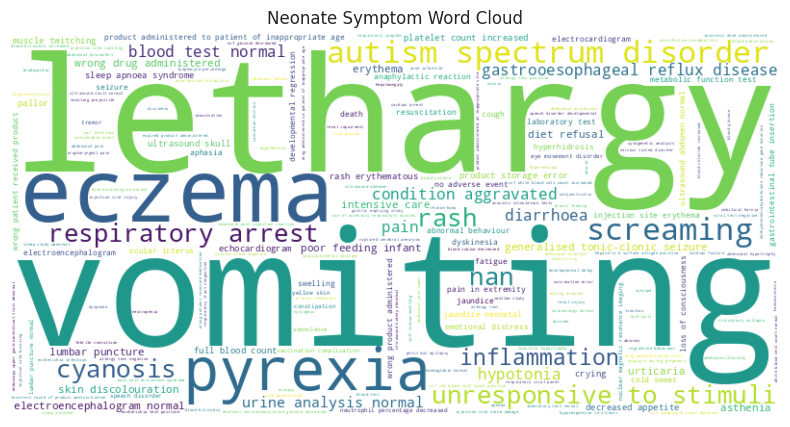

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the list of symptoms into a single string
symptoms_text = ' '.join(neonate_symptoms)

# Create a Counter object to get the most common symptoms
counter = Counter(neonate_symptoms)
most_common = counter.most_common()  # Get the top 10 most common symptoms

# Create a dictionary of symptom frequencies
symptom_freq = dict(most_common)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(symptom_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neonate Symptom Word Cloud')
plt.show()

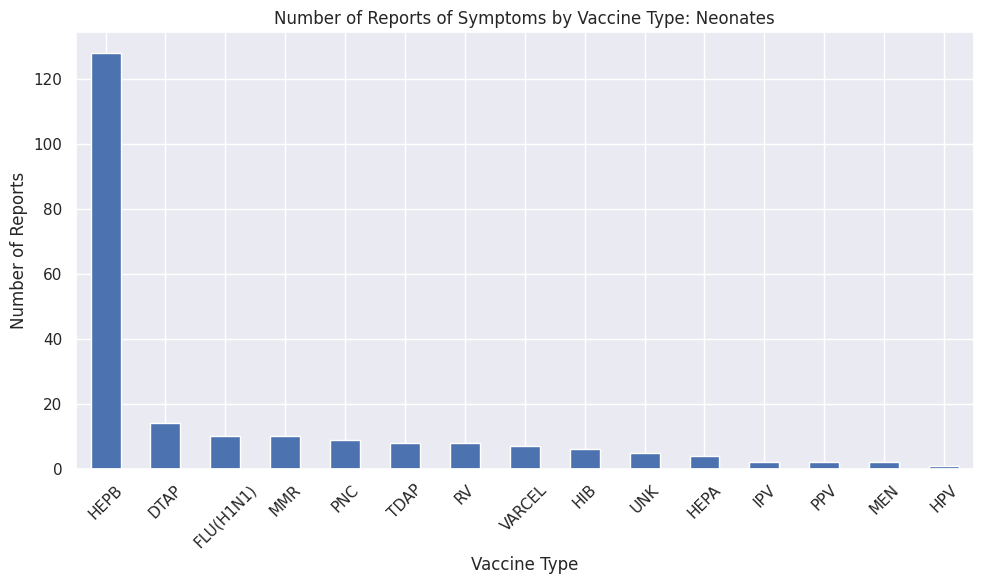

In [ ]:
import matplotlib.pyplot as plt

# Count the number of reports of symptoms for each vaccine type
vaccine_counts = neonate_subset['VAX_TYPE'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
vaccine_counts.plot(kind='bar')
plt.title('Number of Reports of Symptoms by Vaccine Type: Neonates')
plt.xlabel('Vaccine Type')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

constipation                        4
insomnia                            4
diarrhoea                           4
lethargy                            4
eczema                              4
crying                              3
loss of consciousness               3
condition aggravated                3
cold sweat                          3
gastrooesophageal reflux disease    3
dtype: int64


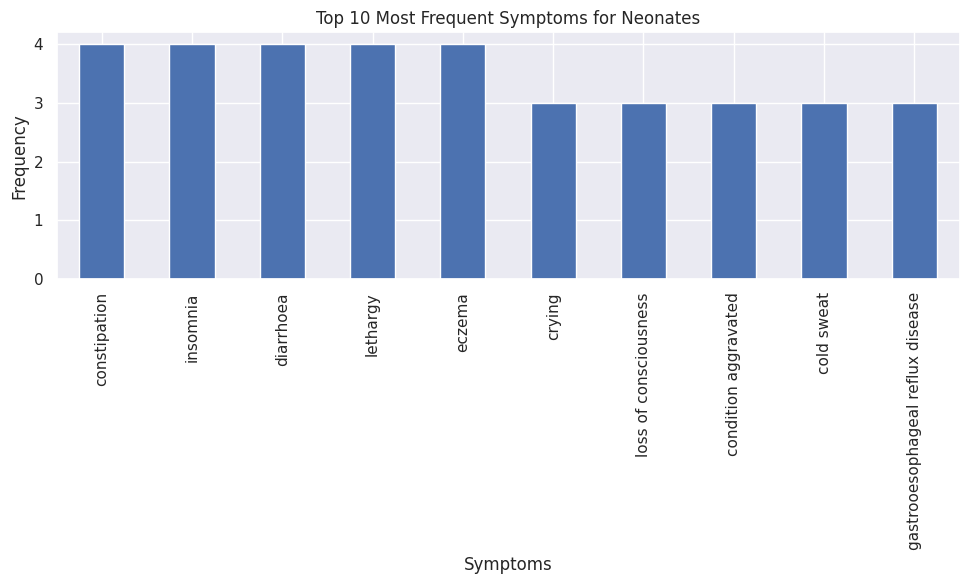

In [ ]:
# Exclude rows with 'nan' or 'no adverse event' values in symptom columns
neonate_subset = neonate_subset[neonate_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'nan']
neonate_subset = neonate_subset[neonate_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'no adverse event']
neonate_subset = neonate_subset[neonate_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != ""]
neonate_subset = neonate_subset.dropna(subset=['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'], how='any')

# Count the occurrences of each symptom
symptom_counts = neonate_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].stack().value_counts()

# Select the top 10 most frequent symptoms
top_10_symptoms = symptom_counts.head(10)
print(top_10_symptoms)
# Plot the bar graph
plt.figure(figsize=(10, 6))
top_10_symptoms.plot(kind='bar')
plt.title('Top 10 Most Frequent Symptoms for Neonates')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Select only pediatric patients by age bucket and subset
neonate_subset = test_df[test_df['AGE_BUCKET'] == 'neonate']

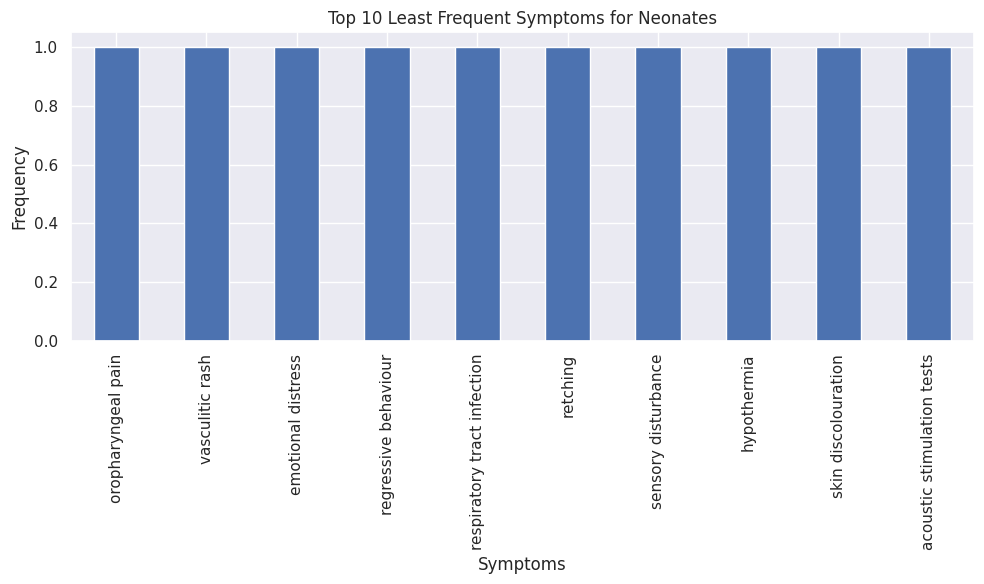

In [ ]:
# Exclude rows with 'nan' or 'no adverse event' values in symptom columns
neonate_subset = neonate_subset[neonate_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'nan']
neonate_subset = neonate_subset[neonate_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'no adverse event']
neonate_subset = neonate_subset[neonate_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != ""]
neonate_subset = neonate_subset.dropna(subset=['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'], how='any')

# Count the occurrences of each symptom
symptom_counts = neonate_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].stack().value_counts()

# Select the top 10 most frequent symptoms
bottom_10_symptoms = symptom_counts.tail(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bottom_10_symptoms.plot(kind='bar')
plt.title('Top 10 Least Frequent Symptoms for Neonates')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Select only pediatric patients by age bucket and subset
neonate_subset = test_df[test_df['AGE_BUCKET'] == 'neonate']

In [ ]:
# Create an empty dictionary to store the dataframes for each vaccine type
vaccine_dataframes = {}

# Iterate over unique vaccine types in the 'VAX_TYPE' column
for vaccine_type in neonate_subset['VAX_TYPE'].unique():
    # Create a new dataframe for the current vaccine type
    vaccine_dataframes[vaccine_type] = neonate_subset[neonate_subset['VAX_TYPE'] == vaccine_type].copy()

# Accessing the dataframes for each vaccine type
vaccine_type_hepb = vaccine_dataframes['HEPB']
vaccine_type_dtap = vaccine_dataframes['DTAP']
vaccine_type_flu = vaccine_dataframes['FLU(H1N1)']
vaccine_type_mmr = vaccine_dataframes['MMR']
vaccine_type_pnc = vaccine_dataframes['PNC']
vaccine_type_tdap = vaccine_dataframes['TDAP']
vaccine_type_rv = vaccine_dataframes['RV']
vaccine_type_varcel = vaccine_dataframes['VARCEL']
vaccine_type_hib = vaccine_dataframes['HIB']
vaccine_type_unk = vaccine_dataframes['UNK']
vaccine_type_hepa = vaccine_dataframes['HEPA']
vaccine_type_ipv = vaccine_dataframes['IPV']
vaccine_type_ppv = vaccine_dataframes['PPV']
vaccine_type_men = vaccine_dataframes['MEN']
vaccine_type_hpv = vaccine_dataframes['HPV']


In [ ]:
vaccine_type_dtap.head()

VAERS_ID  AGE_YRS  SEX  \
785      678501      0.0    1   
4188     686166      0.0    1   
4305     686501      0.0    0   
6906     692900      0.0    0   
17068    714884      0.0    1   

                                            SYMPTOM_TEXT  DIED  L_THREAT  \
785    This is a spontaneous report from a contactabl...     0         0   
4188   This spontaneous report was received from a ce...     0         0   
4305   Hives across belly and some on the back, they ...     0         0   
6906              IMMUNIZATIONS GIVEN AT 2 WEEKS OF AGE.     0         0   
17068  This pt. is a 9 day old baby who has the same ...     0         0   

       ER_VISIT  HOSPITAL  HOSPDAYS  X_STAY  ...  ER_ED_VISIT  ALLERGIES  \
785           0         0       0.0       0  ...            N       nkda   
4188          0         0       0.0       0  ...            N       nkda   
4305          0         0       0.0       0  ...            N       nkda   
6906          0         0       0.0       0  ...            N       nkda   
17068         0         0       0.0       0  ...            N       nkda   

                                                SYMPTOM1  \
785                                               crying   
4188                                    no adverse event   
4305                                           urticaria   
6906   drug administered to patient of inappropriate age   
17068  drug administered to patient of inappropriate age   

                                SYMPTOM2                SYMPTOM3 SYMPTOM4  \
785                   decreased appetite  urine output decreased      nan   
4188   wrong patient received medication                     nan      nan   
4305                                 nan                     nan      nan   
6906                                 nan                     nan      nan   
17068                   no adverse event                     nan      nan   

      SYMPTOM5 VAX_TYPE                      VAX_NAME AGE_BUCKET  
785        nan     DTAP          DTAP (NO BRAND NAME)    neonate  
4188       nan     DTAP  DTAP + HEPB + IPV (PEDIARIX)    neonate  
4305       nan     DTAP  DTAP + HEPB + IPV (PEDIARIX)    neonate  
6906       nan     DTAP  DTAP + HEPB + IPV (PEDIARIX)    neonate  
17068      nan     DTAP   DTAP + IPV + HIB (PENTACEL)    neonate  

[5 rows x 31 columns]

##### Infant

In [ ]:
# Select only pediatric patients by age bucket and subset
infant_subset = test_df[test_df['AGE_BUCKET'] == 'infant']

In [ ]:
# Find unique report for infant subset
infant_subset['VAERS_ID'].nunique()

13133

In [ ]:
# Find average age for infant subset
infant_subset['AGE_YRS'].mean()

0.549125307125307

In [ ]:
# Find Standard Deviation for infant age (years)
infant_subset['AGE_YRS'].std()

0.33709307200142685

In [ ]:
# Calculate the total number of rows in the DataFrame
total_rows = len(infant_subset)

# Calculate the number of hospital visits with value 0
hosp_0_count = infant_subset['HOSPITAL'].value_counts().get(0, 0)  # If 0 is not present, return 0

# Calculate the number of hospital visits with value 1
hosp_1_count = infant_subset['HOSPITAL'].value_counts().get(1, 0)  # If 1 is not present, return 0

# Calculate the percentage of hospital visits with value 0
hosp_0_percentage = (hosp_0_count / total_rows) * 100

# Calculate the percentage of hospital visits with value 1
hosp_1_percentage = (hosp_1_count / total_rows) * 100

# Display the results
print("Percentage of hospital visits with HOSP value 0: {:.2f}%".format(hosp_0_percentage))
print("Percentage of hospital visits with HOSP value 1: {:.2f}%".format(hosp_1_percentage))

Percentage of hospital visits with HOSP value 0: 83.43%
Percentage of hospital visits with HOSP value 1: 16.57%


In [ ]:
# Vaccine type counts
infant_subset['VAX_TYPE'].value_counts()

DTAP         7258
PNC          6362
RV           5258
HIB          3851
MMR          3404
VARCEL       2412
HEPA         2087
FLU(H1N1)    1575
HEPB         1414
COVID19       797
UNK           745
IPV           584
PPV           302
COVID19-2     161
HPV           103
TDAP           93
MEN            90
MENB           44
VARZOS         33
6VAX-F         28
DT             21
HEPAB           7
DF              1
Name: VAX_TYPE, dtype: int64

In [ ]:
# Find sex breakdown for infant subset with only ACIP recommended infant vaccine types
desired_vax_types =["HEPB", "DTAP", "RV", "IPV", "PNC", "HIB", "MMR", "VARCEL", "HEPA", "FLU(H1N1)", "HEPB", "COVID19", "PPV", "COVID19-2", "HEPAB"]
filtered_infant_subset = infant_subset[infant_subset['VAX_TYPE'].isin(desired_vax_types)]

# Count the occurrences of each unique VAERS_ID for each sex
sex_counts = filtered_infant_subset.groupby('SEX')['VAERS_ID'].nunique()

# Display the result
print(sex_counts)

# Count the occurrences of each unique VAERS_ID
vax_type_counts = filtered_infant_subset['VAERS_ID'].nunique()

# Display the result
print(vax_type_counts)

SEX
0    6463
1    6164
Name: VAERS_ID, dtype: int64
12627


In [ ]:
# Create set for each symptom column to find unique symptoms recorded for infant subset
set_infant1 = set(infant_subset['SYMPTOM1'])
set_infant2 = set(infant_subset['SYMPTOM2'])
set_infant3 = set(infant_subset['SYMPTOM3'])
set_infant4 = set(infant_subset['SYMPTOM4'])
set_infant5 = set(infant_subset['SYMPTOM5'])

total_len_infant = len(set_infant1)+len(set_infant2)+len(set_infant3)+len(set_infant4)+len(set_infant5)
print(total_len_infant)

5754


In [ ]:
# Find most frequent symptoms using unique sets above
from collections import Counter

infant_symptoms = []

infant_symptoms.extend(set_infant1)
infant_symptoms.extend(set_infant2)
infant_symptoms.extend(set_infant3)
infant_symptoms.extend(set_infant4)
infant_symptoms.extend(set_infant5)

counter = Counter(infant_symptoms)

# Get the most common unique values
most_common = counter.most_common()

print(most_common)



[('respiratory arrest', 5), ('haemoglobin decreased', 5), ('infantile spasms', 5), ('injection site swelling', 5), ('grunting', 5), ('c-reactive protein increased', 5), ('dyskinesia', 5), ('mean cell haemoglobin normal', 5), ('transfusion', 5), ('injection site pruritus', 5), ('blood lactic acid', 5), ('electroencephalogram abnormal', 5), ('swelling face', 5), ('blood culture negative', 5), ('speech disorder', 5), ('head banging', 5), ('facial paralysis', 5), ('eosinophil count normal', 5), ('streptococcus test', 5), ('wheezing', 5), ('blood calcium normal', 5), ('mean platelet volume normal', 5), ('weight gain poor', 5), ('hypotonic-hyporesponsive episode', 5), ('erythema', 5), ('rash generalised', 5), ('rotavirus test', 5), ('urticaria', 5), ('gastroenteritis', 5), ('petit mal epilepsy', 5), ('haemoglobin normal', 5), ('blood creatine phosphokinase', 5), ('mucous stools', 5), ('gait inability', 5), ('sleep apnoea syndrome', 5), ('injection site bruising', 5), ('condition aggravated',

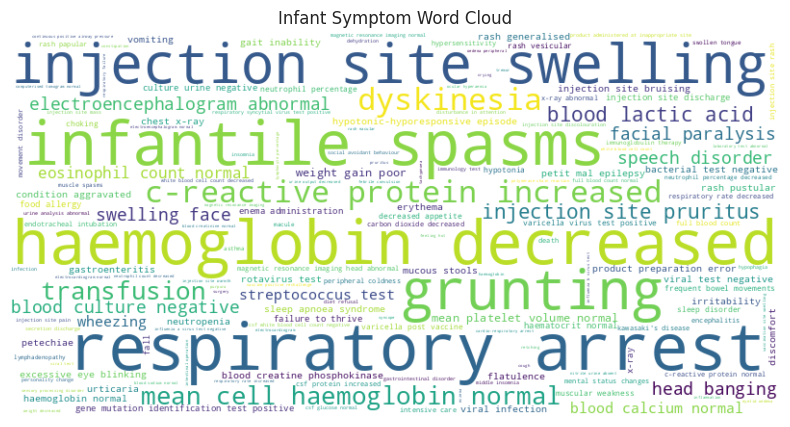

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the list of symptoms into a single string
symptoms_text = ' '.join(infant_symptoms)

# Create a Counter object to get the most common symptoms
counter = Counter(infant_symptoms)
most_common = counter.most_common()  # Get the top 10 most common symptoms

# Create a dictionary of symptom frequencies
symptom_freq = dict(most_common)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(symptom_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Infant Symptom Word Cloud')
plt.show()


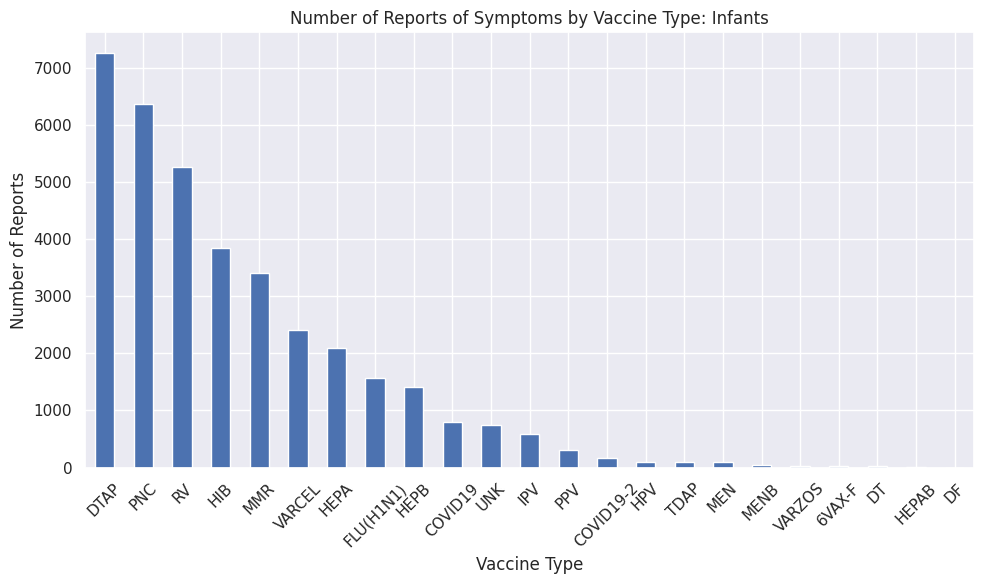

In [ ]:
import matplotlib.pyplot as plt

# Count the number of reports of symptoms for each vaccine type
vaccine_counts = infant_subset['VAX_TYPE'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
vaccine_counts.plot(kind='bar')
plt.title('Number of Reports of Symptoms by Vaccine Type: Infants')
plt.xlabel('Vaccine Type')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

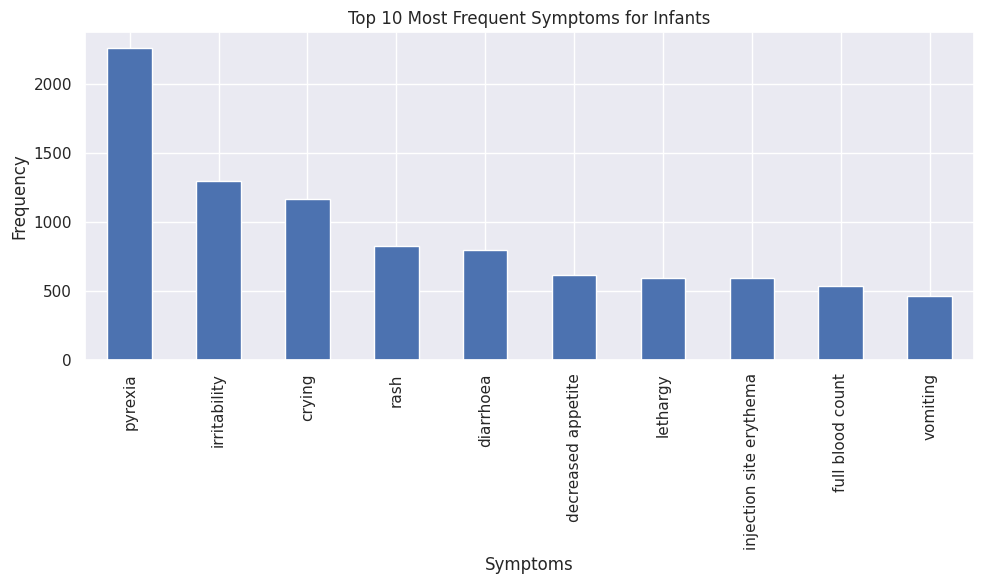

In [ ]:
# Exclude rows with 'nan' or 'no adverse event' values in symptom columns
infant_subset = infant_subset[infant_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'nan']
infant_subset = infant_subset[infant_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'no adverse event']
infant_subset = infant_subset.dropna(subset=['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'], how='any')

# Count the occurrences of each symptom
symptom_counts = infant_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].stack().value_counts()

# Select the top 10 most frequent symptoms
top_10_symptoms = symptom_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
top_10_symptoms.plot(kind='bar')
plt.title('Top 10 Most Frequent Symptoms for Infants')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Select only pediatric patients by age bucket and subset
infant_subset = test_df[test_df['AGE_BUCKET'] == 'infant']

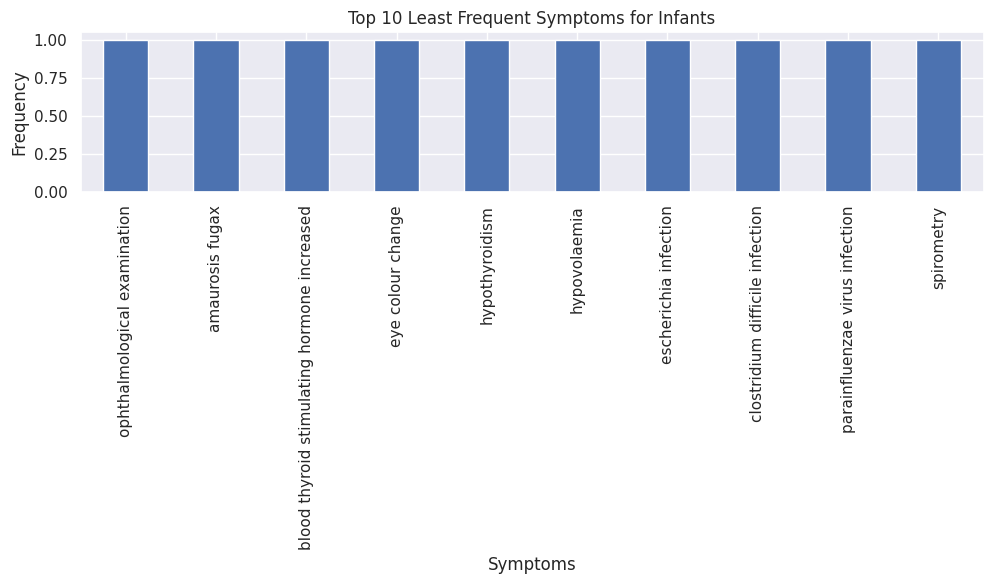

In [ ]:
# Exclude rows with 'nan' or 'no adverse event' values in symptom columns
infant_subset = infant_subset[infant_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'nan']
infant_subset = infant_subset[infant_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'no adverse event']
infant_subset = infant_subset.dropna(subset=['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'], how='any')

# Count the occurrences of each symptom
symptom_counts = infant_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].stack().value_counts()

# Select the top 10 most frequent symptoms
bottom_10_symptoms = symptom_counts.tail(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bottom_10_symptoms.plot(kind='bar')
plt.title('Top 10 Least Frequent Symptoms for Infants')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Select only pediatric patients by age bucket and subset
infant_subset = test_df[test_df['AGE_BUCKET'] == 'infant']

In [ ]:
# Create an empty dictionary to store the dataframes for each vaccine type
vaccine_dataframes = {}

# Iterate over unique vaccine types in the 'VAX_TYPE' column
for vaccine_type in infant_subset['VAX_TYPE'].unique():
    # Create a new dataframe for the current vaccine type
    vaccine_dataframes[vaccine_type] = infant_subset[infant_subset['VAX_TYPE'] == vaccine_type].copy()

# Accessing the dataframes for each vaccine type
vaccine_type_hepb = vaccine_dataframes['HEPB']
vaccine_type_dtap = vaccine_dataframes['DTAP']
vaccine_type_flu = vaccine_dataframes['FLU(H1N1)']
vaccine_type_mmr = vaccine_dataframes['MMR']
vaccine_type_pnc = vaccine_dataframes['PNC']
vaccine_type_tdap = vaccine_dataframes['TDAP']
vaccine_type_rv = vaccine_dataframes['RV']
vaccine_type_varcel = vaccine_dataframes['VARCEL']
vaccine_type_hib = vaccine_dataframes['HIB']
vaccine_type_unk = vaccine_dataframes['UNK']
vaccine_type_hepa = vaccine_dataframes['HEPA']
vaccine_type_ipv = vaccine_dataframes['IPV']
vaccine_type_ppv = vaccine_dataframes['PPV']
vaccine_type_men = vaccine_dataframes['MEN']
vaccine_type_hpv = vaccine_dataframes['HPV']
vaccine_type_covid19 = vaccine_dataframes['COVID19']
vaccine_type_covid19_2 = vaccine_dataframes['COVID19-2']
vaccine_type_menb = vaccine_dataframes['MENB']
vaccine_type_varzos = vaccine_dataframes['VARZOS']
vaccine_type_6vaxf = vaccine_dataframes['6VAX-F']
vaccine_type_dt = vaccine_dataframes['DT']
vaccine_type_hepab = vaccine_dataframes['HEPAB']
vaccine_type_df = vaccine_dataframes['DF']

##### Toddler

In [ ]:
# Select only pediatric patients by age bucket and subset
toddler_subset = test_df[test_df['AGE_BUCKET'] == 'toddler']

In [ ]:
# Unique reports for toddler subset
toddler_subset['VAERS_ID'].nunique()

21800

In [ ]:
# Average toddler age
toddler_subset['AGE_YRS'].mean()

3.041759037335376

In [ ]:
# Standard Deviation of toddler age (years)
toddler_subset['AGE_YRS'].std()

1.43275266515511

In [ ]:
# Calculate the total number of rows in the DataFrame
total_rows = len(toddler_subset)

# Calculate the number of hospital visits with value 0
hosp_0_count = toddler_subset['HOSPITAL'].value_counts().get(0, 0)  # If 0 is not present, return 0

# Calculate the number of hospital visits with value 1
hosp_1_count = toddler_subset['HOSPITAL'].value_counts().get(1, 0)  # If 1 is not present, return 0

# Calculate the percentage of hospital visits with value 0
hosp_0_percentage = (hosp_0_count / total_rows) * 100

# Calculate the percentage of hospital visits with value 1
hosp_1_percentage = (hosp_1_count / total_rows) * 100

# Display the results
print("Percentage of hospital visits with HOSP value 0: {:.2f}%".format(hosp_0_percentage))
print("Percentage of hospital visits with HOSP value 1: {:.2f}%".format(hosp_1_percentage))

Percentage of hospital visits with HOSP value 0: 93.72%
Percentage of hospital visits with HOSP value 1: 6.28%


In [ ]:
desired_vax_types = ["HEPB", "DTAP", "RV", "IPV", "PNC", "HIB", "MMR", "VARCEL", "HEPA", "FLU(H1N1)", "HEPB", "COVID19", "PPV", "COVID19-2", "HEPAB"]
filtered_tod_subset = toddler_subset[toddler_subset['VAX_TYPE'].isin(desired_vax_types)]

# Count the occurrences of each unique VAERS_ID for each sex
sex_counts = filtered_tod_subset.groupby('SEX')['VAERS_ID'].nunique()

# Display the result
print(sex_counts)

# Count the occurrences of each unique VAERS_ID
vax_type_counts = filtered_tod_subset['VAERS_ID'].nunique()

# Display the result
print(vax_type_counts)

SEX
0    11032
1    10121
Name: VAERS_ID, dtype: int64
21153


In [ ]:
set_toddler1 = set(toddler_subset['SYMPTOM1'])
set_toddler2 = set(toddler_subset['SYMPTOM2'])
set_toddler3 = set(toddler_subset['SYMPTOM3'])
set_toddler4 = set(toddler_subset['SYMPTOM4'])
set_toddler5 = set(toddler_subset['SYMPTOM5'])

total_len_toddler = len(set_toddler1)+len(set_toddler2)+len(set_toddler3)+len(set_toddler4)+len(set_toddler5)
print(total_len_toddler)

5907


In [ ]:
from collections import Counter

toddler_symptoms = []

toddler_symptoms.extend(set_toddler1)
toddler_symptoms.extend(set_toddler2)
toddler_symptoms.extend(set_toddler3)
toddler_symptoms.extend(set_toddler4)
toddler_symptoms.extend(set_toddler5)

counter = Counter(toddler_symptoms)

# Get the most common unique values
most_common = counter.most_common()

print(most_common)

[('respiratory arrest', 5), ('haemoglobin decreased', 5), ('injection site swelling', 5), ('c-reactive protein increased', 5), ('language disorder', 5), ('dyskinesia', 5), ('wrong technique in product usage process', 5), ('injection site pruritus', 5), ('swelling face', 5), ('electroencephalogram abnormal', 5), ('blood culture negative', 5), ('speech disorder', 5), ('head banging', 5), ('henoch-schonlein purpura', 5), ('facial paralysis', 5), ('sinusitis', 5), ('streptococcus test', 5), ('wheezing', 5), ('magnetic resonance imaging abnormal', 5), ('eye pruritus', 5), ('erythema', 5), ('rash generalised', 5), ('influenza', 5), ('magnetic resonance imaging brain abnormal', 5), ('leukocytosis', 5), ('urticaria', 5), ('haemoglobin normal', 5), ('gait inability', 5), ('injection site bruising', 5), ('underdose', 5), ('condition aggravated', 5), ('flatulence', 5), ('product preparation error', 5), ('chest x-ray', 5), ('discomfort', 5), ('irritability', 5), ('heart rate decreased', 5), ('bact

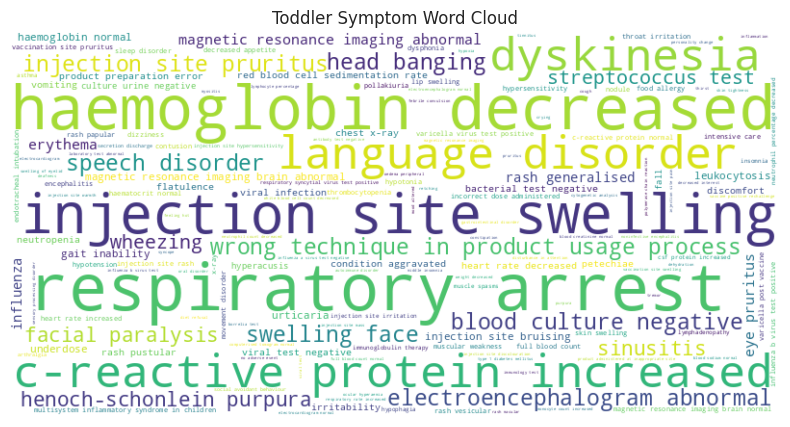

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your code to create the neonate_symptoms list

# Convert the list of symptoms into a single string
symptoms_text = ' '.join(toddler_symptoms)

# Create a Counter object to get the most common symptoms
counter = Counter(toddler_symptoms)
most_common = counter.most_common()  # Get the top 10 most common symptoms

# Create a dictionary of symptom frequencies
symptom_freq = dict(most_common)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(symptom_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Toddler Symptom Word Cloud')
plt.show()

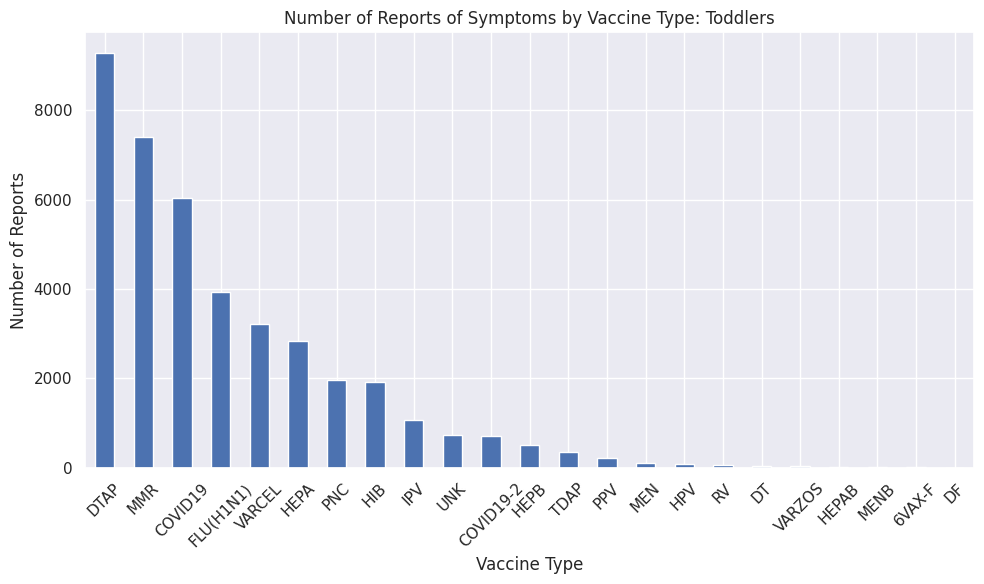

In [ ]:
import matplotlib.pyplot as plt

# Count the number of reports of symptoms for each vaccine type
vaccine_counts = toddler_subset['VAX_TYPE'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
vaccine_counts.plot(kind='bar')
plt.title('Number of Reports of Symptoms by Vaccine Type: Toddlers')
plt.xlabel('Vaccine Type')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

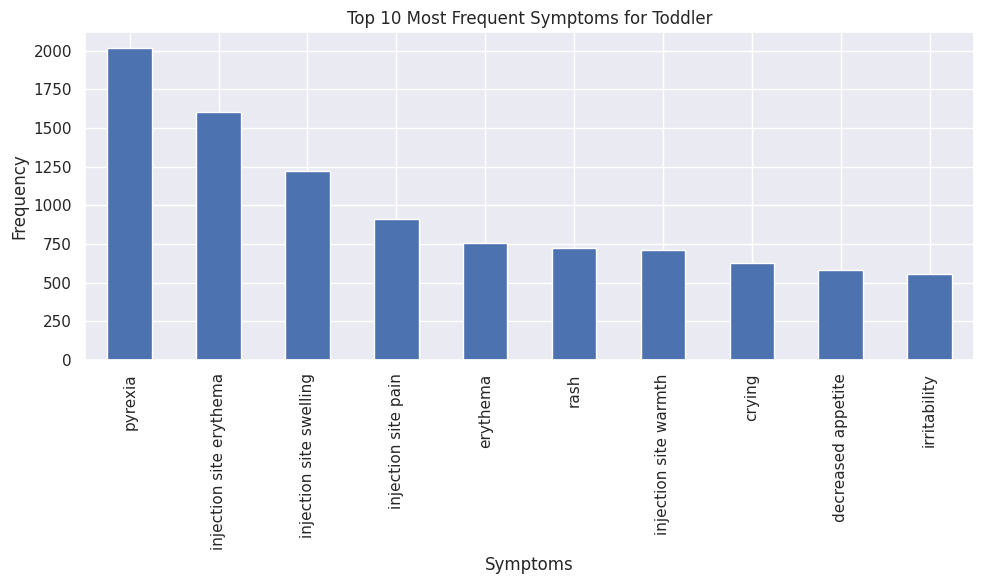

In [ ]:
# Exclude rows with 'nan' or 'no adverse event' values in symptom columns
toddler_subset = toddler_subset[toddler_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'nan']
toddler_subset = toddler_subset[toddler_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'no adverse event']
toddler_subset = toddler_subset.dropna(subset=['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'], how='any')

# Count the occurrences of each symptom
symptom_counts = toddler_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].stack().value_counts()

# Select the top 10 most frequent symptoms
top_10_symptoms = symptom_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
top_10_symptoms.plot(kind='bar')
plt.title('Top 10 Most Frequent Symptoms for Toddler')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Select only pediatric patients by age bucket and subset
toddler_subset = test_df[test_df['AGE_BUCKET'] == 'toddler']

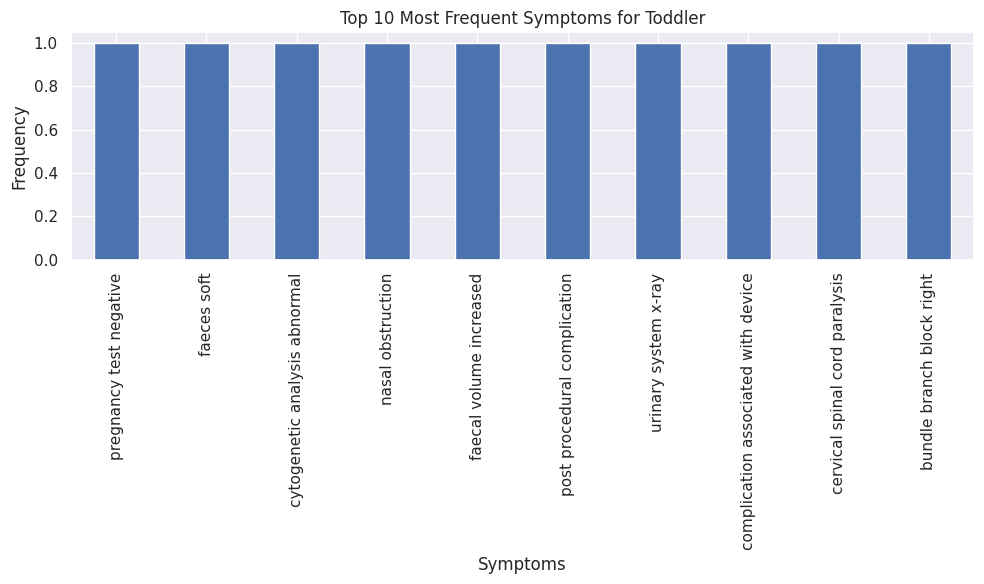

In [ ]:
# Exclude rows with 'nan' or 'no adverse event' values in symptom columns
toddler_subset = toddler_subset[toddler_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'nan']
toddler_subset = toddler_subset[toddler_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'no adverse event']
toddler_subset = toddler_subset.dropna(subset=['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'], how='any')

# Count the occurrences of each symptom
symptom_counts = toddler_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].stack().value_counts()

# Select the top 10 most frequent symptoms
bottom_10_symptoms = symptom_counts.tail(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bottom_10_symptoms.plot(kind='bar')
plt.title('Top 10 Most Frequent Symptoms for Toddler')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Select only pediatric patients by age bucket and subset
toddler_subset = test_df[test_df['AGE_BUCKET'] == 'toddler']

In [ ]:
# Create an empty dictionary to store the dataframes for each vaccine type
vaccine_dataframes = {}

# Iterate over unique vaccine types in the 'VAX_TYPE' column
for vaccine_type in toddler_subset['VAX_TYPE'].unique():
    # Create a new dataframe for the current vaccine type
    vaccine_dataframes[vaccine_type] = toddler_subset[toddler_subset['VAX_TYPE'] == vaccine_type].copy()

# Accessing the dataframes for each vaccine type
vaccine_type_hepb = vaccine_dataframes['HEPB']
vaccine_type_dtap = vaccine_dataframes['DTAP']
vaccine_type_flu = vaccine_dataframes['FLU(H1N1)']
vaccine_type_mmr = vaccine_dataframes['MMR']
vaccine_type_pnc = vaccine_dataframes['PNC']
vaccine_type_tdap = vaccine_dataframes['TDAP']
vaccine_type_rv = vaccine_dataframes['RV']
vaccine_type_varcel = vaccine_dataframes['VARCEL']
vaccine_type_hib = vaccine_dataframes['HIB']
vaccine_type_unk = vaccine_dataframes['UNK']
vaccine_type_hepa = vaccine_dataframes['HEPA']
vaccine_type_ipv = vaccine_dataframes['IPV']
vaccine_type_ppv = vaccine_dataframes['PPV']
vaccine_type_men = vaccine_dataframes['MEN']
vaccine_type_hpv = vaccine_dataframes['HPV']
vaccine_type_covid19 = vaccine_dataframes['COVID19']
vaccine_type_covid19_2 = vaccine_dataframes['COVID19-2']
vaccine_type_menb = vaccine_dataframes['MENB']
vaccine_type_varzos = vaccine_dataframes['VARZOS']
vaccine_type_6vaxf = vaccine_dataframes['6VAX-F']
vaccine_type_dt = vaccine_dataframes['DT']
vaccine_type_hepab = vaccine_dataframes['HEPAB']
vaccine_type_df = vaccine_dataframes['DF']

##### Child

In [ ]:
# Select only pediatric patients by age bucket and subset
child_subset = test_df[test_df['AGE_BUCKET'] == 'child']


In [ ]:
child_subset['VAERS_ID'].nunique()

30816

In [ ]:
child_subset['AGE_YRS'].mean()

10.001770555692431

In [ ]:
child_subset['AGE_YRS'].std()

1.9639323925579693

In [ ]:
# Calculate the total number of rows in the DataFrame
total_rows = len(child_subset)

# Calculate the number of hospital visits with value 0
hosp_0_count = child_subset['HOSPITAL'].value_counts().get(0, 0)  # If 0 is not present, return 0

# Calculate the number of hospital visits with value 1
hosp_1_count = child_subset['HOSPITAL'].value_counts().get(1, 0)  # If 1 is not present, return 0

# Calculate the percentage of hospital visits with value 0
hosp_0_percentage = (hosp_0_count / total_rows) * 100

# Calculate the percentage of hospital visits with value 1
hosp_1_percentage = (hosp_1_count / total_rows) * 100

# Display the results
print("Percentage of hospital visits with HOSP value 0: {:.2f}%".format(hosp_0_percentage))
print("Percentage of hospital visits with HOSP value 1: {:.2f}%".format(hosp_1_percentage))

Percentage of hospital visits with HOSP value 0: 93.85%
Percentage of hospital visits with HOSP value 1: 6.15%


In [ ]:
child_subset['VAX_TYPE'].value_counts()

COVID19      21007
FLU(H1N1)     4433
HPV           4319
MEN           3941
TDAP          3867
COVID19-2     1734
DTAP          1044
MMR            821
HEPA           753
VARCEL         615
UNK            521
IPV            518
HEPB           420
MENB           320
PPV            167
PNC             63
HIB             47
VARZOS          25
DT              18
HEPAB           11
RV               2
DF               1
Name: VAX_TYPE, dtype: int64

In [ ]:
desired_vax_types = ["DTAP", "IPV", "MMR", "VARCEL", "FLU(H1N1)", "COVID19", "COVID19-2", "HPV", "TDAP"]
filtered_child_subset = child_subset[child_subset['VAX_TYPE'].isin(desired_vax_types)]

# Count the occurrences of each unique VAERS_ID for each sex
sex_counts = filtered_child_subset.groupby('SEX')['VAERS_ID'].nunique()

# Display the result
print(sex_counts)

# Count the occurrences of each unique VAERS_ID
vax_type_counts = filtered_child_subset['VAERS_ID'].nunique()

# Display the result
print(vax_type_counts)

SEX
0    14702
1    14414
Name: VAERS_ID, dtype: int64
29116


In [ ]:
desired_vax_types = ["DTAP", "IPV", "MMR", "VARCEL", "FLU(H1N1)", "COVID19", "COVID19-2", "HPV", "TDAP"]
filtered_child_subset = child_subset[child_subset['VAX_TYPE'].isin(desired_vax_types)]

# Count the occurrences of each unique VAERS_ID for each sex
sex_counts = filtered_child_subset.groupby('SEX')['VAERS_ID'].nunique()

# Display the result
print(sex_counts)

SEX
0    14702
1    14414
Name: VAERS_ID, dtype: int64


In [ ]:
desired_vax_types = ["HEPB", "DTAP", "RV", "IPV", "PNC", "HIB", "MMR", "VARCEL", "HEPA", "FLU(H1N1)", "HEPB", "COVID19", "PPV", "COVID19-2", "HEPAB"]
filtered_child_subset = child_subset[child_subset['VAX_TYPE'].isin(desired_vax_types)]

# Count the occurrences of each unique VAERS_ID for each sex
sex_counts = filtered_child_subset.groupby('SEX')['VAERS_ID'].nunique()

# Display the result
print(sex_counts)

# Count the occurrences of each unique VAERS_ID
vax_type_counts = filtered_child_subset['VAERS_ID'].nunique()

# Display the result
print(vax_type_counts)

SEX
0    13032
1    12624
Name: VAERS_ID, dtype: int64
25656


In [ ]:
set_child1 = set(child_subset['SYMPTOM1'])
set_child2 = set(child_subset['SYMPTOM2'])
set_child3 = set(child_subset['SYMPTOM3'])
set_child4 = set(child_subset['SYMPTOM4'])
set_child5 = set(child_subset['SYMPTOM5'])

total_len_child = len(set_child1)+len(set_child2)+len(set_child3)+len(set_child4)+len(set_child5)
print(total_len_child)

7337


In [ ]:
from collections import Counter

child_symptoms = []

child_symptoms.extend(set_child1)
child_symptoms.extend(set_child2)
child_symptoms.extend(set_child3)
child_symptoms.extend(set_child4)
child_symptoms.extend(set_child5)

counter = Counter(child_symptoms)

# Get the most common unique values
most_common = counter.most_common()

print(most_common)

[('haemoglobin decreased', 5), ('injection site swelling', 5), ('pharyngeal swelling', 5), ('blood creatinine increased', 5), ('computerised tomogram abdomen abnormal', 5), ('c-reactive protein increased', 5), ('muscle tightness', 5), ('dyskinesia', 5), ('wrong technique in product usage process', 5), ('pertussis', 5), ('transfusion', 5), ('injection site pruritus', 5), ('hypertension', 5), ('electroencephalogram abnormal', 5), ('swelling face', 5), ('blood culture negative', 5), ('speech disorder', 5), ('henoch-schonlein purpura', 5), ('facial paralysis', 5), ('streptococcus test', 5), ('wheezing', 5), ('blood calcium normal', 5), ('mean platelet volume normal', 5), ('magnetic resonance imaging abnormal', 5), ('mean cell haemoglobin concentration normal', 5), ('n-terminal prohormone brain natriuretic peptide increased', 5), ('erythema', 5), ('hypopnoea', 5), ('rash generalised', 5), ('influenza', 5), ('leukocytosis', 5), ('urticaria', 5), ('blood pressure decreased', 5), ('haemoglobin

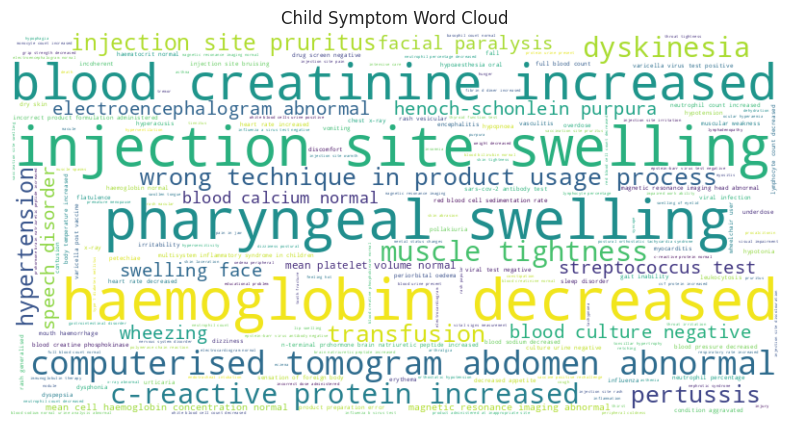

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your code to create the neonate_symptoms list

# Convert the list of symptoms into a single string
symptoms_text = ' '.join(child_symptoms)

# Create a Counter object to get the most common symptoms
counter = Counter(child_symptoms)
most_common = counter.most_common()  # Get the top 10 most common symptoms

# Create a dictionary of symptom frequencies
symptom_freq = dict(most_common)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(symptom_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Child Symptom Word Cloud')
plt.show()

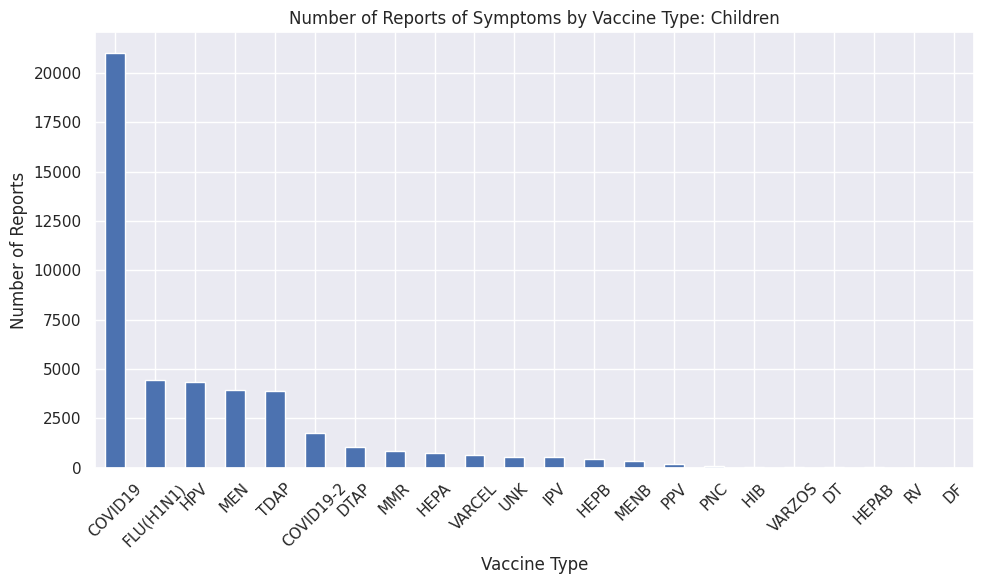

In [ ]:
import matplotlib.pyplot as plt

# Count the number of reports of symptoms for each vaccine type
vaccine_counts = child_subset['VAX_TYPE'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
vaccine_counts.plot(kind='bar')
plt.title('Number of Reports of Symptoms by Vaccine Type: Children')
plt.xlabel('Vaccine Type')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

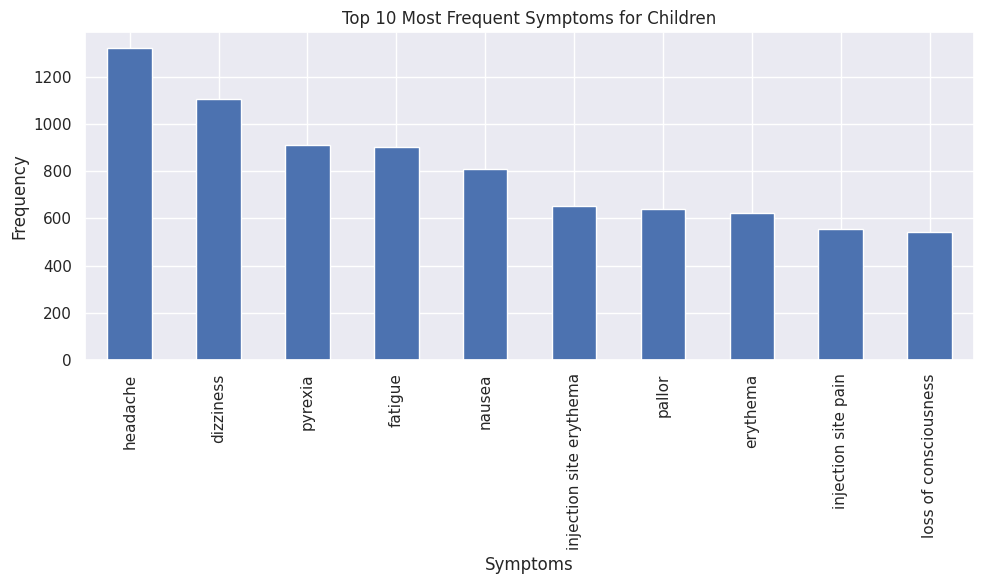

In [ ]:
# Exclude rows with 'nan' or 'no adverse event' values in symptom columns
child_subset = child_subset[child_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'nan']
child_subset = child_subset[child_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'no adverse event']
child_subset = child_subset.dropna(subset=['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'], how='any')

# Count the occurrences of each symptom
symptom_counts = child_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].stack().value_counts()

# Select the top 10 most frequent symptoms
top_10_symptoms = symptom_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
top_10_symptoms.plot(kind='bar')
plt.title('Top 10 Most Frequent Symptoms for Children')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Select only pediatric patients by age bucket and subset
child_subset = test_df[test_df['AGE_BUCKET'] == 'child']

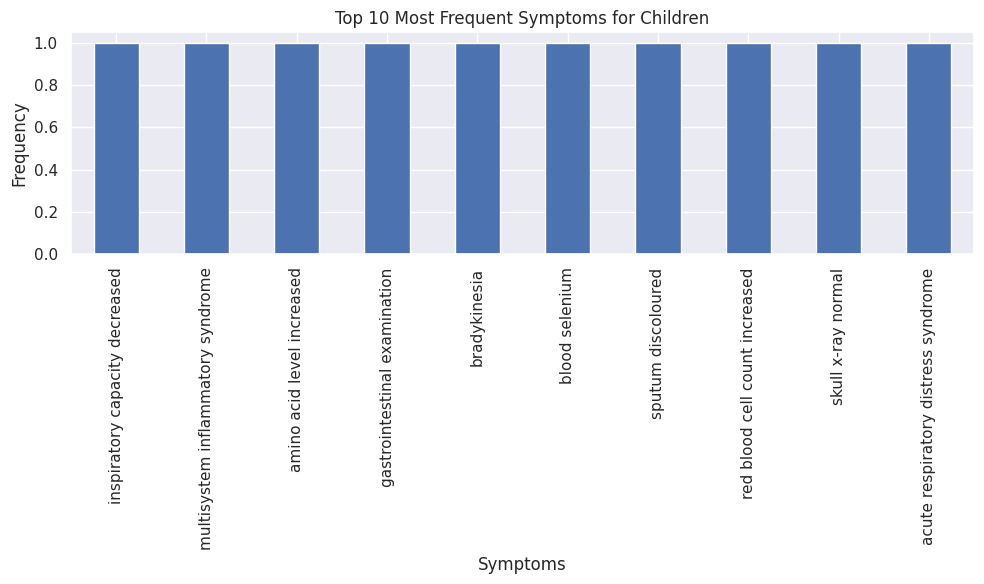

In [ ]:
# Exclude rows with 'nan' or 'no adverse event' values in symptom columns
child_subset = child_subset[child_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'nan']
child_subset = child_subset[child_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'no adverse event']
child_subset = child_subset.dropna(subset=['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'], how='any')

# Count the occurrences of each symptom
symptom_counts = child_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].stack().value_counts()

# Select the top 10 most frequent symptoms
bottom_10_symptoms = symptom_counts.tail(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bottom_10_symptoms.plot(kind='bar')
plt.title('Top 10 Most Frequent Symptoms for Children')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Select only pediatric patients by age bucket and subset
child_subset = test_df[test_df['AGE_BUCKET'] == 'child']

In [ ]:
# Create an empty dictionary to store the dataframes for each vaccine type
vaccine_dataframes = {}

# Iterate over unique vaccine types in the 'VAX_TYPE' column
for vaccine_type in child_subset['VAX_TYPE'].unique():
    # Create a new dataframe for the current vaccine type
    vaccine_dataframes[vaccine_type] = child_subset[child_subset['VAX_TYPE'] == vaccine_type].copy()

# Accessing the dataframes for each vaccine type
vaccine_type_hepb = vaccine_dataframes['HEPB']
vaccine_type_dtap = vaccine_dataframes['DTAP']
vaccine_type_flu = vaccine_dataframes['FLU(H1N1)']
vaccine_type_mmr = vaccine_dataframes['MMR']
vaccine_type_pnc = vaccine_dataframes['PNC']
vaccine_type_tdap = vaccine_dataframes['TDAP']
vaccine_type_rv = vaccine_dataframes['RV']
vaccine_type_varcel = vaccine_dataframes['VARCEL']
vaccine_type_hib = vaccine_dataframes['HIB']
vaccine_type_unk = vaccine_dataframes['UNK']
vaccine_type_hepa = vaccine_dataframes['HEPA']
vaccine_type_ipv = vaccine_dataframes['IPV']
vaccine_type_ppv = vaccine_dataframes['PPV']
vaccine_type_men = vaccine_dataframes['MEN']
vaccine_type_hpv = vaccine_dataframes['HPV']
vaccine_type_covid19 = vaccine_dataframes['COVID19']
vaccine_type_covid19_2 = vaccine_dataframes['COVID19-2']
vaccine_type_menb = vaccine_dataframes['MENB']
vaccine_type_varzos = vaccine_dataframes['VARZOS']
#vaccine_type_6vaxf = vaccine_dataframes['6VAX-F']
vaccine_type_dt = vaccine_dataframes['DT']
vaccine_type_hepab = vaccine_dataframes['HEPAB']
vaccine_type_df = vaccine_dataframes['DF']


##### Adolescent

In [ ]:
# Select only pediatric patients by age bucket and subset
adolescent_subset = test_df[test_df['AGE_BUCKET'] == 'adolescent']


In [ ]:
adolescent_subset['VAERS_ID'].nunique()

68202

In [ ]:
adolescent_subset['AGE_YRS'].mean()

17.10198493485342

In [ ]:
adolescent_subset['AGE_YRS'].std()

2.3741337556393183

In [ ]:
# Calculate the total number of rows in the DataFrame
total_rows = len(adolescent_subset)

# Calculate the number of hospital visits with value 0
hosp_0_count = adolescent_subset['HOSPITAL'].value_counts().get(0, 0)  # If 0 is not present, return 0

# Calculate the number of hospital visits with value 1
hosp_1_count = adolescent_subset['HOSPITAL'].value_counts().get(1, 0)  # If 1 is not present, return 0

# Calculate the percentage of hospital visits with value 0
hosp_0_percentage = (hosp_0_count / total_rows) * 100

# Calculate the percentage of hospital visits with value 1
hosp_1_percentage = (hosp_1_count / total_rows) * 100

# Display the results
print("Percentage of hospital visits with HOSP value 0: {:.2f}%".format(hosp_0_percentage))
print("Percentage of hospital visits with HOSP value 1: {:.2f}%".format(hosp_1_percentage))

Percentage of hospital visits with HOSP value 0: 90.20%
Percentage of hospital visits with HOSP value 1: 9.80%


In [ ]:
adolescent_subset['VAX_TYPE'].value_counts()

COVID19      66656
HPV           6176
MENB          5454
MEN           4874
FLU(H1N1)     4666
HEPA          1614
TDAP          1589
COVID19-2     1571
UNK           1267
HEPB          1071
MMR           1001
VARCEL         994
IPV            554
PPV            289
DTAP           194
HEPAB          117
PNC             53
VARZOS          44
HIB             36
DT              10
DF              10
Name: VAX_TYPE, dtype: int64

In [ ]:
adolescent_subset['AGE_YRS'].std()

2.3741337556393183

In [ ]:
desired_vax_types = ["FLU(H1N1)", "COVID19", "COVID19-2", "MEN", "MENB", "HPV", "TDAP"]
filtered_child_subset = child_subset[child_subset['VAX_TYPE'].isin(desired_vax_types)]

# Count the occurrences of each unique VAERS_ID for each sex
sex_counts = filtered_child_subset.groupby('SEX')['VAERS_ID'].nunique()

# Display the result
print(sex_counts)

# Count the occurrences of each unique VAERS_ID
vax_type_counts = filtered_child_subset['VAERS_ID'].nunique()

# Display the result
print(vax_type_counts)

SEX
0    14507
1    14080
Name: VAERS_ID, dtype: int64
28587


In [ ]:
set_adolescent1 = set(adolescent_subset['SYMPTOM1'])
set_adolescent2 = set(adolescent_subset['SYMPTOM2'])
set_adolescent3 = set(adolescent_subset['SYMPTOM3'])
set_adolescent4 = set(adolescent_subset['SYMPTOM4'])
set_adolescent5 = set(adolescent_subset['SYMPTOM5'])

total_len_adolescent = len(set_adolescent1)+len(set_adolescent2)+len(set_adolescent3)+len(set_adolescent4)+len(set_adolescent5)
print(total_len_adolescent)

12566


In [ ]:
from collections import Counter

adolescent_symptoms = []

adolescent_symptoms.extend(set_adolescent1)
adolescent_symptoms.extend(set_adolescent2)
adolescent_symptoms.extend(set_adolescent3)
adolescent_symptoms.extend(set_adolescent4)
adolescent_symptoms.extend(set_adolescent5)

counter = Counter(adolescent_symptoms)

# Get the most common unique values
most_common_adolescent = counter.most_common()

print(most_common_adolescent)

[('muscle twitching', 5), ('blood albumin normal', 5), ('hunger', 5), ('incomplete course of vaccination', 5), ('ventricular hypokinesia', 5), ('parosmia', 5), ('viral test', 5), ('incorrect dose administered', 5), ('neutrophil count decreased', 5), ('ear discomfort', 5), ('haematuria', 5), ('resuscitation', 5), ('chest x-ray normal', 5), ('photosensitivity reaction', 5), ('tooth fracture', 5), ('skin burning sensation', 5), ('blood calcium normal', 5), ('optic neuritis', 5), ('skin lesion', 5), ('scan with contrast normal', 5), ('muscle tightness', 5), ('throat clearing', 5), ('blood urea decreased', 5), ('electroencephalogram normal', 5), ('liver disorder', 5), ('tremor', 5), ('thrombectomy', 5), ('vaccine positive rechallenge', 5), ('haematemesis', 5), ('epstein-barr virus antibody positive', 5), ('oxygen saturation decreased', 5), ('pregnancy test urine negative', 5), ('enterovirus test negative', 5), ('tongue disorder', 5), ('complement factor c4', 5), ('nail discolouration', 5), 

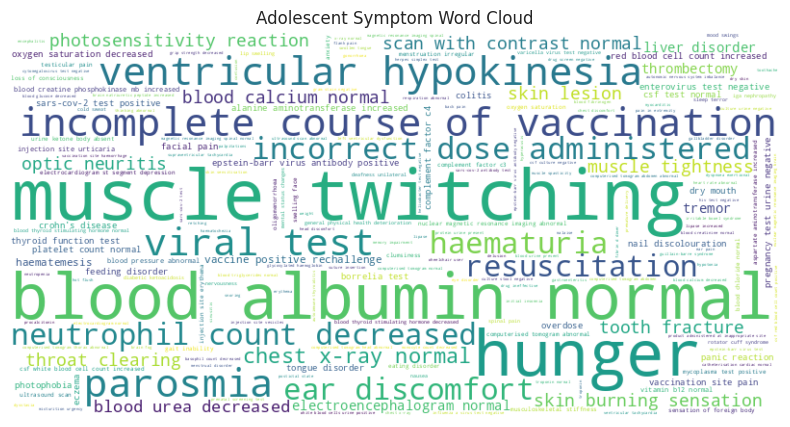

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the list of symptoms into a single string
symptoms_text = ' '.join(adolescent_symptoms)

# Create a Counter object to get the most common symptoms
counter = Counter(adolescent_symptoms)
most_common = counter.most_common()  # Get the top 10 most common symptoms

# Create a dictionary of symptom frequencies
symptom_freq = dict(most_common)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(symptom_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Adolescent Symptom Word Cloud')
plt.show()

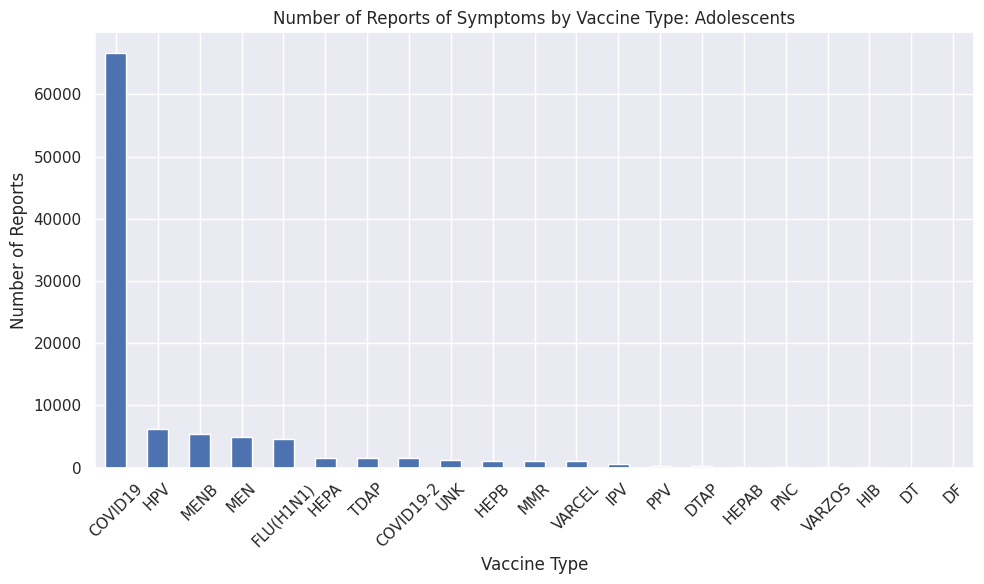

In [ ]:
import matplotlib.pyplot as plt

# Count the number of reports of symptoms for each vaccine type
vaccine_counts = adolescent_subset['VAX_TYPE'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
vaccine_counts.plot(kind='bar')
plt.title('Number of Reports of Symptoms by Vaccine Type: Adolescents')
plt.xlabel('Vaccine Type')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

headache                 4970
dizziness                4594
fatigue                  3607
nausea                   3583
chills                   3001
pyrexia                  2687
pain                     2530
chest pain               2421
dyspnoea                 2188
hyperhidrosis            1954
loss of consciousness    1585
asthenia                 1457
pain in extremity        1432
pallor                   1402
injection site pain      1286
syncope                  1211
myalgia                  1097
malaise                  1047
fall                      966
electrocardiogram         940
dtype: int64


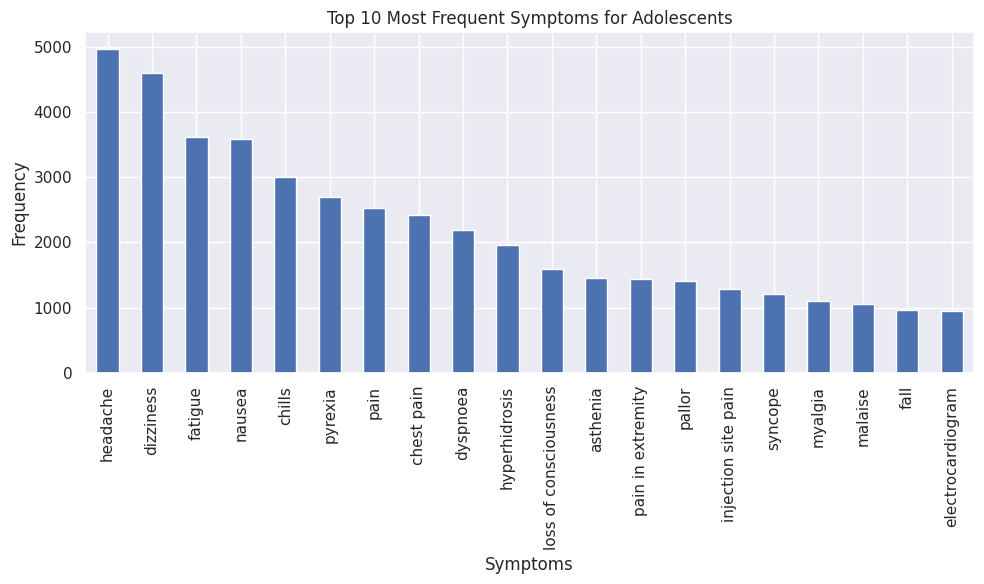

In [ ]:
# Exclude rows with 'nan' or 'no adverse event' values in symptom columns
adolescent_subset = adolescent_subset[adolescent_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'nan']
adolescent_subset = adolescent_subset[adolescent_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'no adverse event']
adolescent_subset = adolescent_subset.dropna(subset=['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'], how='any')

# Count the occurrences of each symptom
symptom_counts = adolescent_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].stack().value_counts()

# Select the top 10 most frequent symptoms
top_10_symptoms = symptom_counts.head(20)
print(top_10_symptoms)
# Plot the bar graph
plt.figure(figsize=(10, 6))
top_10_symptoms.plot(kind='bar')
plt.title('Top 10 Most Frequent Symptoms for Adolescents')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Select only pediatric patients by age bucket and subset
adolescent_subset = test_df[test_df['AGE_BUCKET'] == 'adolescent']


cardiac sarcoidosis               1
granuloma                         1
persistent depressive disorder    1
cholestasis                       1
cholangitis                       1
albumin csf abnormal              1
chlamydia test positive           1
ankle fracture                    1
interferon gamma level            1
anhedonia                         1
dtype: int64


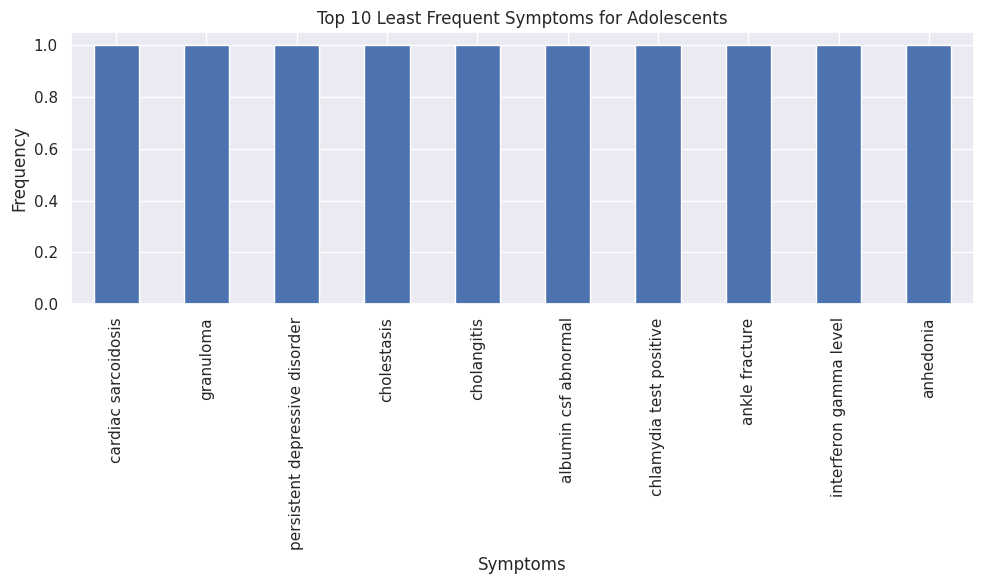

In [ ]:
# Exclude rows with 'nan' or 'no adverse event' values in symptom columns
adolescent_subset = adolescent_subset[adolescent_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'nan']
adolescent_subset = adolescent_subset[adolescent_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']] != 'no adverse event']
adolescent_subset = adolescent_subset.dropna(subset=['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'], how='any')

# Count the occurrences of each symptom
symptom_counts = adolescent_subset[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].stack().value_counts()

# Select the top 10 most frequent symptoms
bottom_10_symptoms = symptom_counts.tail(10)
print(bottom_10_symptoms)
# Plot the bar graph
plt.figure(figsize=(10, 6))
bottom_10_symptoms.plot(kind='bar')
plt.title('Top 10 Least Frequent Symptoms for Adolescents')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Select only pediatric patients by age bucket and subset
adolescent_subset = test_df[test_df['AGE_BUCKET'] == 'adolescent']


In [ ]:
# Create an empty dictionary to store the dataframes for each vaccine type
vaccine_dataframes = {}

# Iterate over unique vaccine types in the 'VAX_TYPE' column
for vaccine_type in adolescent_subset['VAX_TYPE'].unique():
    # Create a new dataframe for the current vaccine type
    vaccine_dataframes[vaccine_type] = adolescent_subset[adolescent_subset['VAX_TYPE'] == vaccine_type].copy()

# Accessing the dataframes for each vaccine type
vaccine_type_hepb = vaccine_dataframes['HEPB']
vaccine_type_dtap = vaccine_dataframes['DTAP']
vaccine_type_flu = vaccine_dataframes['FLU(H1N1)']
vaccine_type_mmr = vaccine_dataframes['MMR']
vaccine_type_pnc = vaccine_dataframes['PNC']
vaccine_type_tdap = vaccine_dataframes['TDAP']
#vaccine_type_rv = vaccine_dataframes['RV']
vaccine_type_varcel = vaccine_dataframes['VARCEL']
vaccine_type_hib = vaccine_dataframes['HIB']
vaccine_type_unk = vaccine_dataframes['UNK']
vaccine_type_hepa = vaccine_dataframes['HEPA']
vaccine_type_ipv = vaccine_dataframes['IPV']
vaccine_type_ppv = vaccine_dataframes['PPV']
vaccine_type_men = vaccine_dataframes['MEN']
vaccine_type_hpv = vaccine_dataframes['HPV']
vaccine_type_covid19 = vaccine_dataframes['COVID19']
vaccine_type_covid19_2 = vaccine_dataframes['COVID19-2']
vaccine_type_menb = vaccine_dataframes['MENB']
vaccine_type_varzos = vaccine_dataframes['VARZOS']
#vaccine_type_6vaxf = vaccine_dataframes['6VAX-F']
vaccine_type_dt = vaccine_dataframes['DT']
vaccine_type_hepab = vaccine_dataframes['HEPAB']
vaccine_type_df = vaccine_dataframes['DF']


#### Attempt 1

In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=932ad630a079e879b68e0a22535c6784e513c3ec25d4b11d324e41b9bab6fba6
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
!pip install mlxtend

In [ ]:
# Import Packages
import sys
import numpy as np
import pandas as pd
import sklearn
from apyori import apriori
from mlxtend.frequent_patterns import apriori

In [ ]:
# Check prior to analysis that all intended-to-be analyzed columns do not have missing values
test_df.isna().sum()

VAERS_ID             0
AGE_YRS              0
SEX                  0
SYMPTOM_TEXT       369
DIED                 0
L_THREAT             0
ER_VISIT             0
HOSPITAL             0
HOSPDAYS             0
X_STAY               0
DISABLE              0
RECOVD               0
NUMDAYS              0
LAB_DATA        118397
OTHER_MEDS       90590
CUR_ILL          93767
HISTORY          88909
PRIOR_VAX       210431
SPLTTYPE        190419
BIRTH_DEFECT         0
OFC_VISIT            0
ER_ED_VISIT          0
ALLERGIES            6
SYMPTOM1             0
SYMPTOM2             0
SYMPTOM3             0
SYMPTOM4             0
SYMPTOM5             0
VAX_TYPE             0
VAX_NAME             0
AGE_BUCKET           0
dtype: int64

In [ ]:
# dataframe shape
test_df.shape

(220204, 31)

##### Utility Functions

Created on Mon May 22 19:11:23 2023

Author: AXT391

HIDS Capstone Project - VAERS Dataset

Utility Functions


In [ ]:
#%% Packages

import sys, collections
import numpy as np
import pandas as pd
import sklearn
from apyori import apriori

#%% Most Frequent Values in a List

def get_most_frequent_values(list_of_values, n_most_frequent):

    counter_values = collections.Counter(list_of_values)
    most_common = counter_values.most_common(n_most_frequent) # most_common() produces k frequently encountered input values and their respective counts.
    counter_frequent_keys = [list(counter_values.most_common(n_most_frequent))[i][0] for i in range(0, len(list(counter_values.most_common(n_most_frequent))))]
    counter_frequent_counts = [list(counter_values.most_common(n_most_frequent))[i][1] for i in range(0, len(list(counter_values.most_common(n_most_frequent))))]

    return counter_frequent_keys, counter_frequent_counts

#%% Association Rule Mining

def get_market_basket_analysis_results(list_elements, min_support, min_confidence, min_lift, min_length):

    association_results = list(apriori(list_elements, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, min_length=min_length))

    # save to data frame
    list_all_based_diagnosis = [''] * len(association_results)
    list_all_support = [0] * len(association_results)
    list_all_added_diagnosis = [''] * len(association_results)
    list_all_confidence = [0] * len(association_results)
    list_all_lift_diagnosis = [0] * len(association_results)

    for i in range(0, len(association_results)):
        # base diagnosis
        #list_all_based_diagnosis[i] = [v for v in association_results[i].ordered_statistics[0][0]][0]
        list_all_based_diagnosis[i] = [v for v in association_results[i].ordered_statistics[0].items_base]
        # support value
        list_all_support[i] = association_results[i].support
        # added diagnosis
        #list_all_added_diagnosis[i] = [v for v in association_results[i].ordered_statistics[0][1]][0]
        list_all_added_diagnosis[i] = [v for v in association_results[i].ordered_statistics[0].items_add]
        # confidence value
        list_all_confidence[i] = association_results[i].ordered_statistics[0][2]
        # lift value
        list_all_lift_diagnosis[i] = association_results[i].ordered_statistics[0][3]

    df_results_market_basket_analysis = pd.DataFrame(columns=['based symptom', 'support', 'added symptom', 'confidence', 'lift'])
    df_results_market_basket_analysis['based symptom'] = list_all_based_diagnosis
    df_results_market_basket_analysis['support'] = list_all_support
    df_results_market_basket_analysis['added symptom'] = list_all_added_diagnosis
    df_results_market_basket_analysis['confidence'] = list_all_confidence
    df_results_market_basket_analysis['lift'] = list_all_lift_diagnosis

    return df_results_market_basket_analysis

#%% Prepare Data for Market-Basket Analysis

def get_data_for_market_basket_analysis(df):

    df['symptoms_all'] = ""

    list_symptoms = []

    for i in range(0, df.shape[0]):
        symptoms = [df['SYMPTOM1'].iloc[i], df['SYMPTOM2'].iloc[i], df['SYMPTOM3'].iloc[i], df['SYMPTOM4'].iloc[i], df['SYMPTOM5'].iloc[i]]
        list_symptoms.append([v for v in symptoms if v!="" and v!= 'no adverse event' and str(v)!="nan"])


    df['symptoms_all'] = list_symptoms

    return df





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Market Basket Analysis

In [ ]:
#%% Market-Basket Analysis

# From: https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

# Each vaccine type or age group will be commented out or in based on what data will be used for MBA

# Symptoms for market-basket analysis
#neonate_subset = get_data_for_market_basket_analysis(neonate_subset)
vaccine_type_covid19_2 = get_data_for_market_basket_analysis(vaccine_type_covid19_2)
#infant_subset = get_data_for_market_basket_analysis(infant_subset)
#toddler_subset = get_data_for_market_basket_analysis(toddler_subset)
#child_subset = get_data_for_market_basket_analysis(child_subset)
#adolescent_subset = get_data_for_market_basket_analysis(adolescent_subset)

#all_subset = get_data_for_market_basket_analysis(all_subset)


# set parameters
min_support = 0.001
min_confidence = 0.5 #0.8
min_lift = 1
min_length = 2

year = "2017-2023"

df_results_market_basket_analysis = get_market_basket_analysis_results(vaccine_type_covid19_2['symptoms_all'], min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, min_length=min_length)
inds_inc = [i for (i,v) in enumerate(df_results_market_basket_analysis['based symptom']) if v!=[]]
df_results_market_basket_analysis = df_results_market_basket_analysis.iloc[inds_inc, :].copy()
#df_results_market_basket_analysis.to_excel(r"/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/allneonate_results_market_basket_analysis_"+year+"_support_"+str(min_support)+"_conf_"+str(min_confidence)+"_lift_"+str(min_lift)+"_length_"+str(min_length)+".xlsx")

print(df_results_market_basket_analysis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                      based symptom   support  \
0                            [adenovirus infection]  0.001153   
1                                       [agitation]  0.001153   
2                                       [agitation]  0.001153   
3                                       [agitation]  0.001153   
4                                         [amnesia]  0.001153   
..                                              ...       ...   
95                                       [swelling]  0.001153   
96  [pain in extremity, wrong product administered]  0.001153   
97                                [seizure, pallor]  0.001153   
98                                      [agitation]  0.001153   
99             [product preparation issue, fatigue]  0.001153   

                                        added symptom  confidence        lift  
0                                          [headache]    1.000000   51.000000  
1                                  [feeling abnormal]    1.

In [ ]:
# Save MBA results to excel sheet
df_results_market_basket_analysis.to_excel(r"/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/child_covid19-2_results_market_basket_analysis_"+year+"_support_"+str(min_support)+"_conf_"+str(min_confidence)+"_lift_"+str(min_lift)+"_length_"+str(min_length)+".xlsx")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Attempt 2: Allergies

##### Utility Functions

In [ ]:
#%% Packages

import sys, collections
import numpy as np
import pandas as pd
import sklearn
from apyori import apriori

#%% Most Frequent Values in a List

def get_most_frequent_values(list_of_values, n_most_frequent):

    counter_values = collections.Counter(list_of_values)
    most_common = counter_values.most_common(n_most_frequent) # most_common() produces k frequently encountered input values and their respective counts.
    counter_frequent_keys = [list(counter_values.most_common(n_most_frequent))[i][0] for i in range(0, len(list(counter_values.most_common(n_most_frequent))))]
    counter_frequent_counts = [list(counter_values.most_common(n_most_frequent))[i][1] for i in range(0, len(list(counter_values.most_common(n_most_frequent))))]

    return counter_frequent_keys, counter_frequent_counts

#%% Association Rule Mining

def get_market_basket_analysis_results(list_elements, min_support, min_confidence, min_lift, min_length):

    association_results = list(apriori(list_elements, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, min_length=min_length))

    # save to data frame
    list_all_based_diagnosis = [''] * len(association_results)
    list_all_support = [0] * len(association_results)
    list_all_added_diagnosis = [''] * len(association_results)
    list_all_confidence = [0] * len(association_results)
    list_all_lift_diagnosis = [0] * len(association_results)

    for i in range(0, len(association_results)):
        # base diagnosis
        #list_all_based_diagnosis[i] = [v for v in association_results[i].ordered_statistics[0][0]][0]
        list_all_based_diagnosis[i] = [v for v in association_results[i].ordered_statistics[0].items_base]
        # support value
        list_all_support[i] = association_results[i].support
        # added diagnosis
        #list_all_added_diagnosis[i] = [v for v in association_results[i].ordered_statistics[0][1]][0]
        list_all_added_diagnosis[i] = [v for v in association_results[i].ordered_statistics[0].items_add]
        # confidence value
        list_all_confidence[i] = association_results[i].ordered_statistics[0][2]
        # lift value
        list_all_lift_diagnosis[i] = association_results[i].ordered_statistics[0][3]

    df_results_market_basket_analysis = pd.DataFrame(columns=['based symptom', 'support', 'added symptom', 'confidence', 'lift'])
    df_results_market_basket_analysis['based symptom'] = list_all_based_diagnosis
    df_results_market_basket_analysis['support'] = list_all_support
    df_results_market_basket_analysis['added symptom'] = list_all_added_diagnosis
    df_results_market_basket_analysis['confidence'] = list_all_confidence
    df_results_market_basket_analysis['lift'] = list_all_lift_diagnosis

    return df_results_market_basket_analysis

#%% Prepare Data for Market-Basket Analysis

def get_data_for_market_basket_analysis(df):

    df['symptoms_all'] = ""

    list_symptoms = []

    for i in range(0, df.shape[0]):
        symptoms = [df['SYMPTOM1'].iloc[i], df['SYMPTOM2'].iloc[i], df['SYMPTOM3'].iloc[i], df['SYMPTOM4'].iloc[i], df['SYMPTOM5'].iloc[i], df['ALLERGIES'].iloc[i]]
        list_symptoms.append([v for v in symptoms if v!="" and v!= 'no adverse event' and str(v)!="nan" and str(v)!="nkda"])


    df['symptoms_all'] = list_symptoms

    return df





##### Market Basket Analysis

In [ ]:
## ORIGINAL CODE: AZADE
#%% Market-Basket Analysis

# From: https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

# The function above was altered to also included allergies instead of just symptoms

# Symptoms for market-basket analysis
#neonate_subset = get_data_for_market_basket_analysis(neonate_subset)
#infant_subset = get_data_for_market_basket_analysis(infant_subset)
#toddler_subset = get_data_for_market_basket_analysis(toddler_subset)
#child_subset = get_data_for_market_basket_analysis(child_subset)
adolescent_subset = get_data_for_market_basket_analysis(adolescent_subset)

#all_subset = get_data_for_market_basket_analysis(all_subset)


# set parameters
min_support = 0.001
min_confidence = 0.5 #0.8
min_lift = 1
min_length = 2

year = "2017-2023"

df_results_market_basket_analysis = get_market_basket_analysis_results(adolescent_subset['symptoms_all'], min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, min_length=min_length)
inds_inc = [i for (i,v) in enumerate(df_results_market_basket_analysis['based symptom']) if v!=[]]
df_results_market_basket_analysis = df_results_market_basket_analysis.iloc[inds_inc, :].copy()
#df_results_market_basket_analysis.to_excel(r"/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/allneonate_results_market_basket_analysis_"+year+"_support_"+str(min_support)+"_conf_"+str(min_confidence)+"_lift_"+str(min_lift)+"_length_"+str(min_length)+".xlsx")

print(df_results_market_basket_analysis)

<ipython-input-121-4f1bffc97458>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['symptoms_all'] = ""
<ipython-input-121-4f1bffc97458>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['symptoms_all'] = list_symptoms


KeyboardInterrupt: ignored

In [ ]:
#df_results_market_basket_analysis.to_excel(r"/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/adolescent_with_allergies_results_market_basket_analysis_"+year+"_support_"+str(min_support)+"_conf_"+str(min_confidence)+"_lift_"+str(min_lift)+"_length_"+str(min_length)+".xlsx")


### KMeans Clustering

In [ ]:
# Import Packages
import pandas as pd
from sklearn.cluster import KMeans


In [ ]:
# Select symptom columns and vaccine type
symptom_columns = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
vax_type_column = 'VAX_TYPE'


#### Neonate Subset

In [ ]:
neonate_subset['HOSPITAL'].value_counts()

0    162
1     54
Name: HOSPITAL, dtype: int64

In [ ]:
neonate_SAE_subset = neonate_subset[neonate_subset['HOSPITAL'] == 1]

In [ ]:
neonate_nonSAE_subset = neonate_subset[neonate_subset['HOSPITAL'] == 0]

In [ ]:
#neonate_symptom_data = neonate_SAE_subset[symptom_columns]
neonate_symptom_data = neonate_nonSAE_subset[symptom_columns]

In [ ]:
# Replace 'no adverse event' with NaN
neonate_symptom_data[neonate_symptom_data == 'no adverse event'] = np.nan


<ipython-input-125-03fc87bcab2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neonate_symptom_data[neonate_symptom_data == 'no adverse event'] = np.nan
<ipython-input-125-03fc87bcab2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neonate_symptom_data[neonate_symptom_data == 'no adverse event'] = np.nan


In [ ]:
# Address missing values using imputation
neonate_symptom_data.fillna('')
neonate_symptom_data.replace(np.nan, "", inplace=True)

<ipython-input-126-083f1d8c52db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neonate_symptom_data.replace(np.nan, "", inplace=True)


In [ ]:
neonate_symptom_data.isna().sum()

SYMPTOM1    0
SYMPTOM2    0
SYMPTOM3    0
SYMPTOM4    0
SYMPTOM5    0
dtype: int64

In [ ]:
# One-hot-encoding symptom features for age group
neonate_symptom_data_encoded = pd.get_dummies(neonate_symptom_data, columns=symptom_columns)


In [ ]:
# One-hot-encoding vaccine type for age group
neonate_vax_data = neonate_SAE_subset[vax_type_column]
vax_type_encoded = pd.get_dummies(neonate_vax_data, columns=vax_type_column)


In [ ]:
# X_df is symptoms, y_df is vaccine type (cluster labels)
X_df = neonate_symptom_data_encoded
y_df = vax_type_encoded

In [ ]:
# Scaling X (Symptom data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

In [ ]:
# imports
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(X_pca)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [ ]:
# The lowest SSE value
kmeans.inertia_

943.9848966446091

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-1.11082156e+00,  3.16656256e-03],
       [ 5.09445751e+00, -1.45225111e-02]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

5

In [ ]:
# visualize labels
kmeans.labels_[:5]

array([1, 0, 0, 0, 0], dtype=int32)

In [ ]:
# predicting using kmeans
y_kmeans = kmeans.predict(X_pca)

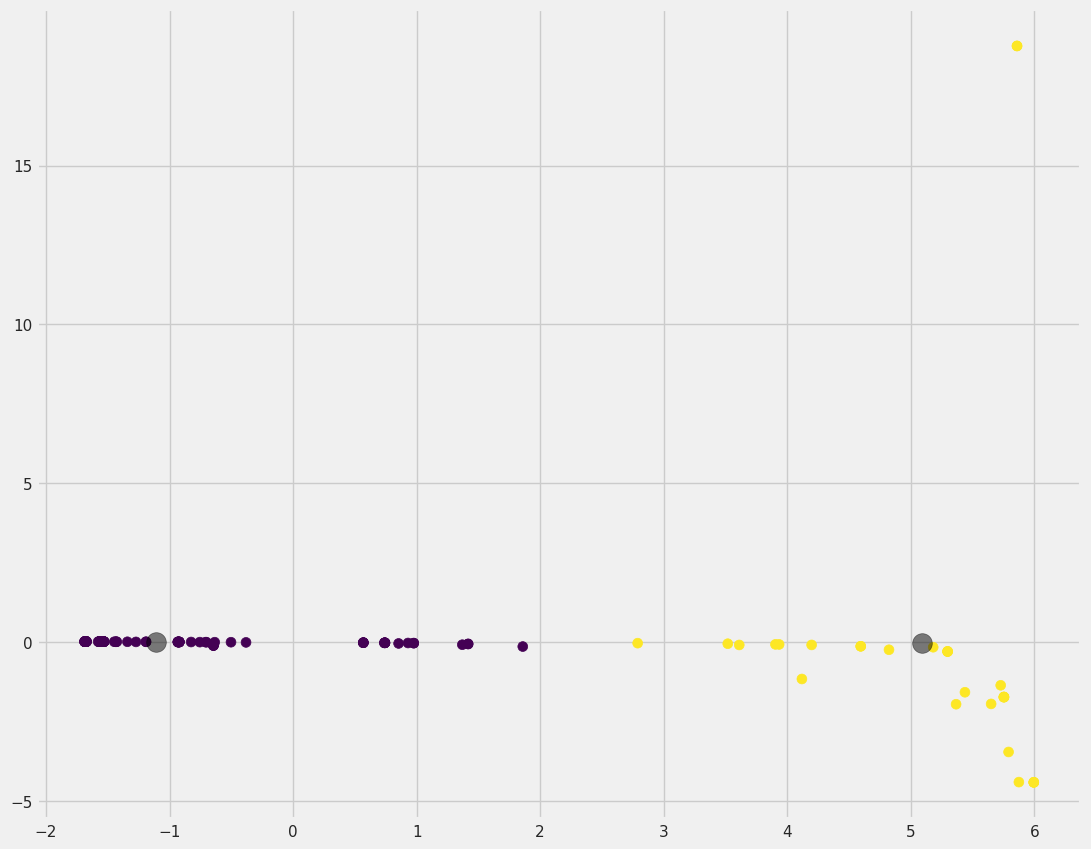

In [ ]:
# plotting clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
num_of_clusters = 3

#intialize kmeans
kmeans = KMeans(
    init="random",
    n_clusters=num_of_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

#fit kmeans
kmeans.fit(X_pca)

##cluster quality measure
# The lowest SSE value
kmeans.inertia_

185.12010390943067

##### Elbow Method

In [ ]:
# Elbow method
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

In [ ]:
print(sse)

[1860.7557319103894, 943.9848966446091, 185.12010390943067, 95.49571782841414, 44.25984985366128, 32.12599400415043, 31.581173920448478, 29.664994577366883, 24.789581797256574, 24.49162819039301]


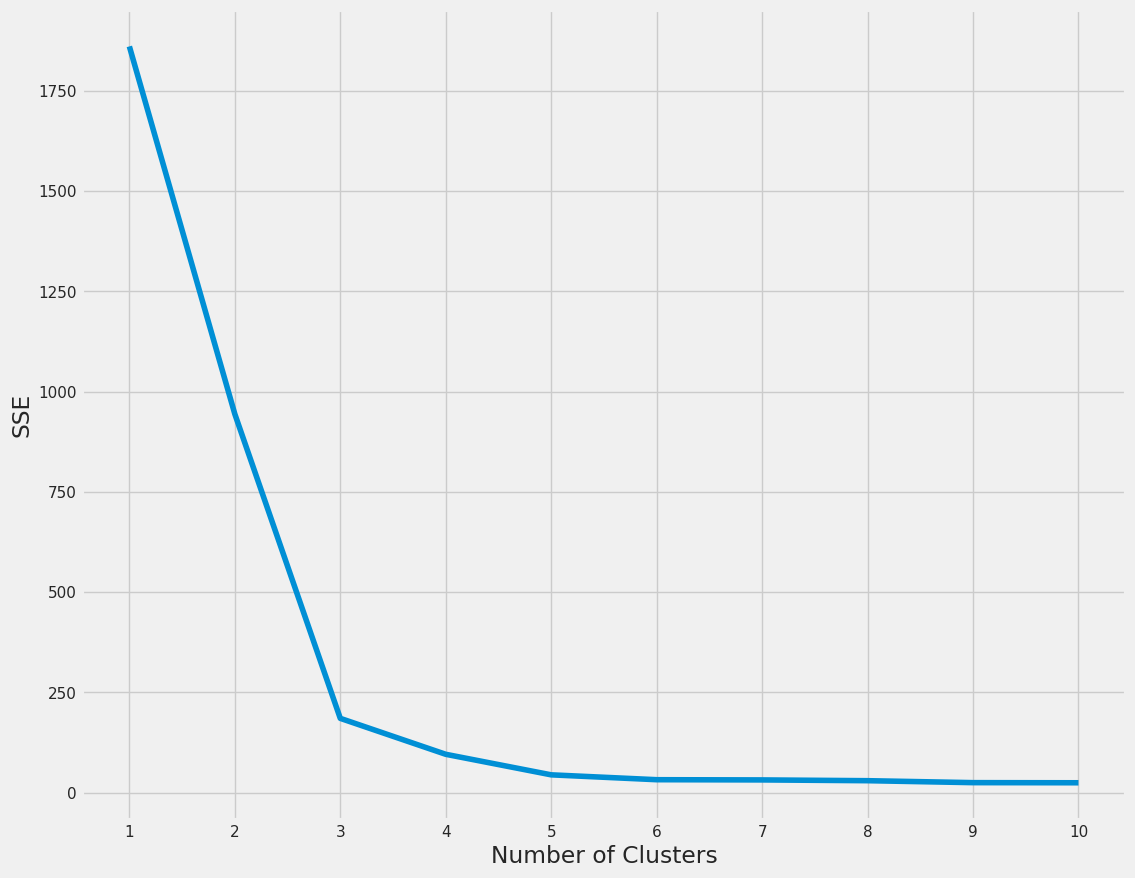

In [ ]:
# plotting elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

##### Tracking Vaccine Type Index

In [ ]:
cluster_labels = kmeans.labels_


In [ ]:
neonate_nonSAE_subset['Cluster'] = cluster_labels


<ipython-input-147-d1acdcc46621>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neonate_nonSAE_subset['Cluster'] = cluster_labels


In [ ]:
# Create a new dataframe to store vaccine type, cluster label, and symptoms
vaccine_cluster_symptoms_df = pd.DataFrame({'VAX_TYPE': neonate_nonSAE_subset['VAX_TYPE'], 'Cluster': cluster_labels})
for col in symptom_columns:
    vaccine_cluster_symptoms_df[col] = neonate_nonSAE_subset[col]

# Group the dataframe by vaccine type and collect the indices and symptoms of each group
grouped = vaccine_cluster_symptoms_df.groupby(['VAX_TYPE', 'Cluster'])

# Print the vaccine types, cluster indices, and symptoms for each cluster
for (vax_type, cluster), group in grouped:
    print("Vaccine Type:", vax_type)
    print("Cluster:", cluster)
    print("Cluster Indices:", group.index.tolist())
    print("Symptoms:")
    symptoms = group[symptom_columns].values.tolist()
    symptoms_without_nan = [[symptom for symptom in symptom_list if str(symptom) != 'nan'] for symptom_list in symptoms]
    print(symptoms_without_nan)
    print()


Vaccine Type: DTAP
Cluster: 0
Cluster Indices: [4305, 6906, 32304, 36140, 47272, 85241]
Symptoms:
[['urticaria'], ['drug administered to patient of inappropriate age'], ['drug administered to patient of inappropriate age'], ['wrong product administered'], ['wrong product administered'], ['haematochezia']]

Vaccine Type: DTAP
Cluster: 2
Cluster Indices: [785, 18191, 44528]
Symptoms:
[['crying', 'decreased appetite', 'urine output decreased'], ['abdominal pain upper', 'dyspnoea', 'vomiting projectile'], ['anaphylactic reaction', 'cough', 'wheezing']]

Vaccine Type: DTAP
Cluster: 6
Cluster Indices: [4188, 17068, 25955, 50816]
Symptoms:
[['no adverse event', 'wrong patient received medication'], ['drug administered to patient of inappropriate age', 'no adverse event'], ['no adverse event', 'wrong drug administered'], ['product administered to patient of inappropriate age', 'wrong patient received product']]

Vaccine Type: DTAP
Cluster: 7
Cluster Indices: [21488]
Symptoms:
[['autism spectru

In [ ]:
import csv

# Assuming you have the original dataframe 'df' containing the vaccine types and symptom columns

# Create a new dataframe to store vaccine type, cluster label, and symptoms
vaccine_cluster_symptoms_df = pd.DataFrame({'VAX_TYPE': neonate_nonSAE_subset['VAX_TYPE'], 'Cluster': cluster_labels})
for col in symptom_columns:
    vaccine_cluster_symptoms_df[col] = neonate_nonSAE_subset[col]

# Group the dataframe by vaccine type and collect the indices and symptoms of each group
grouped = vaccine_cluster_symptoms_df.groupby(['VAX_TYPE', 'Cluster'])

# Prepare the data to be saved
output_data = []
for (vax_type, cluster), group in grouped:
    indices = group.index.tolist()
    symptoms = group[symptom_columns].values.tolist()
    symptoms_without_nan = [[symptom for symptom in symptom_list if str(symptom) != 'nan'] for symptom_list in symptoms]
    output_data.append([vax_type, cluster, indices, symptoms_without_nan])

# Save the data to a CSV file
output_file = '/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/neonate_nonSAE_cluster_output.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Vaccine Type', 'Cluster', 'Indices', 'Symptoms'])
    for data_row in output_data:
        writer.writerow(data_row)

#### Infant Subset

In [ ]:
infant_SAE_subset = infant_subset[infant_subset['HOSPITAL'] == 1]
infant_nonSAE_subset = infant_subset[infant_subset['HOSPITAL'] == 0]

In [ ]:
#infant_symptom_data = infant_subset[symptom_columns]
infant_symptom_data = infant_SAE_subset[symptom_columns]


In [ ]:
# Replace 'no adverse event' with NaN
infant_symptom_data[infant_symptom_data == 'no adverse event'] = np.nan


<ipython-input-80-d148ae4857ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infant_symptom_data[infant_symptom_data == 'no adverse event'] = np.nan
<ipython-input-80-d148ae4857ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infant_symptom_data[infant_symptom_data == 'no adverse event'] = np.nan


In [ ]:
infant_symptom_data.fillna('')
infant_symptom_data.replace(np.nan, "", inplace=True)

<ipython-input-81-e88a1407ea55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infant_symptom_data.replace(np.nan, "", inplace=True)


In [ ]:
infant_symptom_data.isna().sum()

SYMPTOM1    0
SYMPTOM2    0
SYMPTOM3    0
SYMPTOM4    0
SYMPTOM5    0
dtype: int64

In [ ]:
infant_symptom_data_encoded = pd.get_dummies(infant_symptom_data, columns=symptom_columns)


In [ ]:
infant_vax_data = infant_subset[vax_type_column]
vax_type_encoded = pd.get_dummies(infant_vax_data, columns=vax_type_column)


In [ ]:
X_df = infant_symptom_data_encoded
y_df = vax_type_encoded

In [ ]:
# Scaling X (Symptom data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

In [ ]:
# imports
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(X_pca)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [ ]:
# The lowest SSE value
kmeans.inertia_

43906.944843665224

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-1.39470898, -0.3621415 ],
       [ 1.73629142,  0.45083468]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

4

In [ ]:
# visualize labels
kmeans.labels_[:5]

array([0, 0, 0, 0, 1], dtype=int32)

In [ ]:
# predicting using kmeans
y_kmeans = kmeans.predict(X_pca)

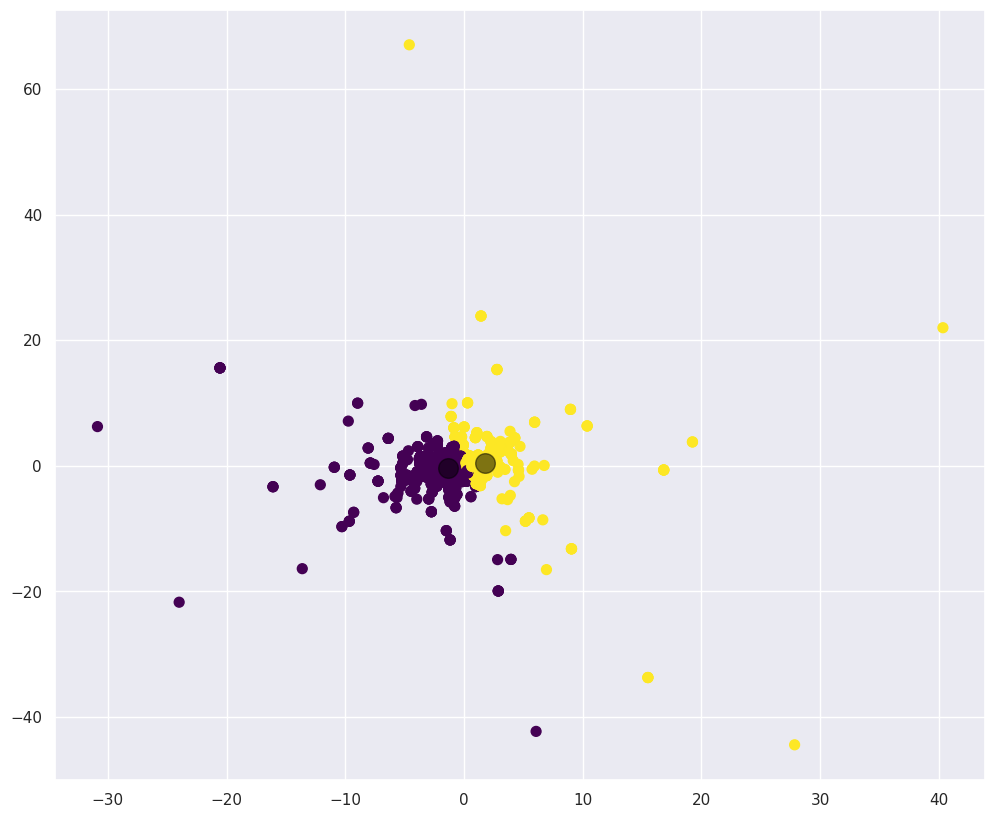

In [ ]:
# plotting clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
num_of_clusters = 6

#intialize kmeans
kmeans = KMeans(
    init="random",
    n_clusters=num_of_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

#fit kmeans
kmeans.fit(X_pca)

##cluster quality measure
# The lowest SSE value
kmeans.inertia_

21283.799250001233

##### Elbow Method

In [ ]:
# Elbow method
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

In [ ]:
print(sse)

[59592.19173555044, 43906.944843665224, 33920.31645467949, 27475.369182243754, 24069.565453587355, 21283.799250001233, 19666.1835773548, 17399.0348716046, 15064.089102349417, 13059.160776845605]


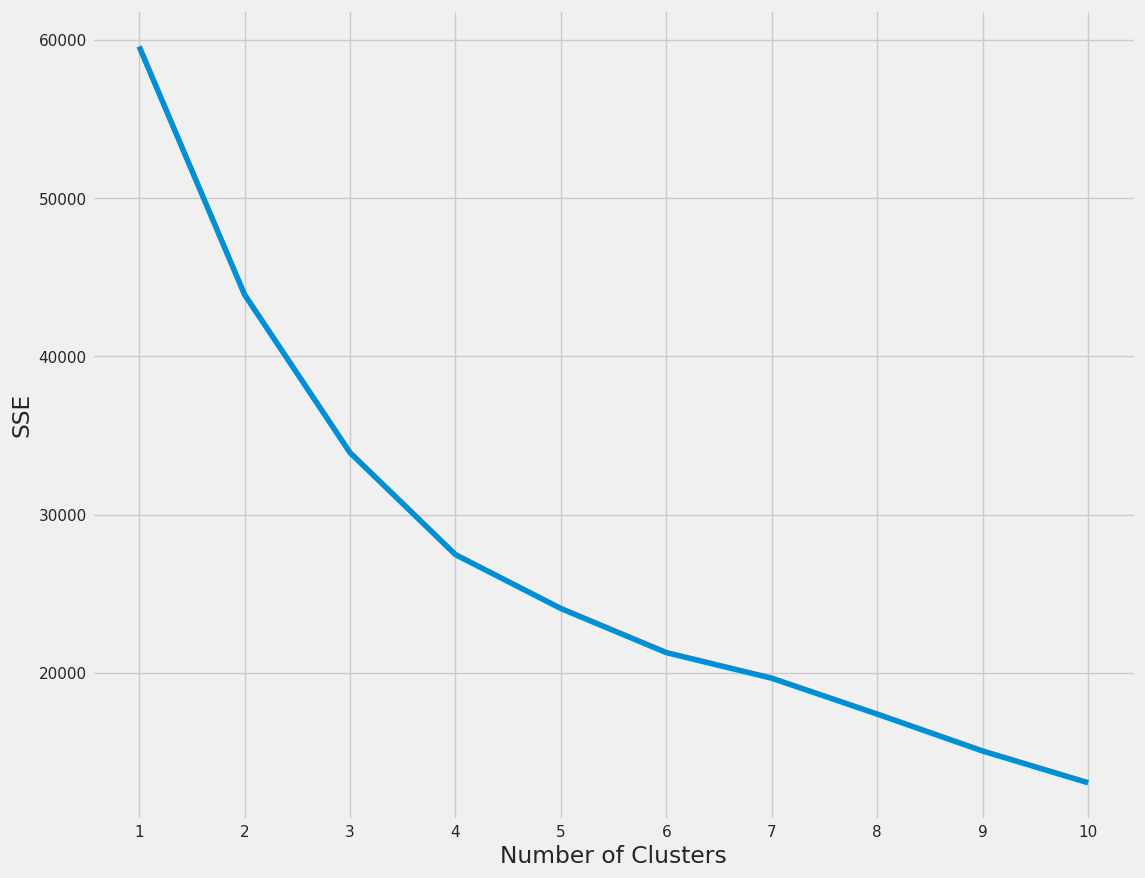

In [ ]:
# plotting elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

##### Tracking Vaccine Type Index

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
infant_subset['Cluster'] = cluster_labels

ValueError: ignored

In [ ]:
# Create a new dataframe to store vaccine type, cluster label, and symptoms
vaccine_cluster_symptoms_df = pd.DataFrame({'VAX_TYPE': infant_SAE_subset['VAX_TYPE'], 'Cluster': cluster_labels})
for col in symptom_columns:
    vaccine_cluster_symptoms_df[col] = infant_SAE_subset[col]

# Group the dataframe by vaccine type and collect the indices and symptoms of each group
grouped = vaccine_cluster_symptoms_df.groupby(['VAX_TYPE', 'Cluster'])

# Print the vaccine types, cluster indices, and symptoms for each cluster
for (vax_type, cluster), group in grouped:
    print("Vaccine Type:", vax_type)
    print("Cluster:", cluster)
    print("Cluster Indices:", group.index.tolist())
    print("Symptoms:")
    symptoms = group[symptom_columns].values.tolist()
    symptoms_without_nan = [[symptom for symptom in symptom_list if str(symptom) != 'nan'] for symptom_list in symptoms]
    print(symptoms_without_nan)
    print()

Vaccine Type: 6VAX-F
Cluster: 9
Cluster Indices: [6296]
Symptoms:
[['anaphylactic shock']]

Vaccine Type: COVID19
Cluster: 2
Cluster Indices: [101673, 117339, 117340, 118277, 136346, 146702, 170772, 194596, 201228, 211109, 211110, 216158, 220112]
Symptoms:
[['blood test', 'computerised tomogram', 'dysphagia', 'hypoaesthesia', 'hypoaesthesia oral'], ['back pain', 'chest pain', 'groin pain', 'laboratory test', 'pain'], ['back pain', 'chest pain', 'groin pain', 'laboratory test', 'pain'], ['bacterial test negative', 'blood glucose normal', 'computerised tomogram normal', 'electroencephalogram normal', 'exposure via breast milk'], ['blood test abnormal', 'contusion', 'haematuria', 'immune thrombocytopenia', 'immunoglobulin therapy'], ['atrial fibrillation', 'cardioversion', 'condition aggravated', 'laboratory test', 'palpitations'], ['acoustic stimulation tests', 'brief resolved unexplained event', 'cardiac function test', 'foetal exposure during pregnancy'], ['gastrointestinal disorder', 

In [ ]:
import csv

# Assuming you have the original dataframe 'df' containing the vaccine types and symptom columns

# Create a new dataframe to store vaccine type, cluster label, and symptoms
vaccine_cluster_symptoms_df = pd.DataFrame({'VAX_TYPE': infant_SAE_subset['VAX_TYPE'], 'Cluster': cluster_labels})
for col in symptom_columns:
    vaccine_cluster_symptoms_df[col] = infant_SAE_subset[col]

# Group the dataframe by vaccine type and collect the indices and symptoms of each group
grouped = vaccine_cluster_symptoms_df.groupby(['VAX_TYPE', 'Cluster'])

# Prepare the data to be saved
output_data = []
for (vax_type, cluster), group in grouped:
    indices = group.index.tolist()
    symptoms = group[symptom_columns].values.tolist()
    symptoms_without_nan = [[symptom for symptom in symptom_list if str(symptom) != 'nan'] for symptom_list in symptoms]
    output_data.append([vax_type, cluster, indices, symptoms_without_nan])

# Save the data to a CSV file
output_file = '/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/infant_SAE_cluster_output.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Vaccine Type', 'Cluster', 'Indices', 'Symptoms'])
    for data_row in output_data:
        writer.writerow(data_row)

#### Toddler Subset

In [ ]:
toddler_SAE_subset = toddler_subset[toddler_subset['HOSPITAL'] == 1]
toddler_nonSAE_subset = toddler_subset[toddler_subset['HOSPITAL'] == 0]

In [ ]:
##toddler_symptom_data = toddler_subset[symptom_columns]
toddler_symptom_data = toddler_SAE_subset[symptom_columns]
#toddler_symptom_data = toddler_nonSAE_subset[symptom_columns]


In [ ]:
# Replace 'no adverse event' with NaN
toddler_symptom_data[toddler_symptom_data == 'no adverse event'] = np.nan


<ipython-input-111-3b71da946def>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toddler_symptom_data[toddler_symptom_data == 'no adverse event'] = np.nan
<ipython-input-111-3b71da946def>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toddler_symptom_data[toddler_symptom_data == 'no adverse event'] = np.nan


In [ ]:
toddler_symptom_data.fillna('')
toddler_symptom_data.replace(np.nan, "", inplace=True)

<ipython-input-112-d8ed34e60473>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toddler_symptom_data.replace(np.nan, "", inplace=True)


In [ ]:
toddler_symptom_data_encoded = pd.get_dummies(toddler_symptom_data, columns=symptom_columns)


In [ ]:
toddler_vax_data = toddler_SAE_subset[vax_type_column]
vax_type_encoded = pd.get_dummies(toddler_vax_data, columns=vax_type_column)


In [ ]:
X_df = toddler_symptom_data_encoded
y_df = vax_type_encoded

In [ ]:
# Scaling X (Symptom data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

In [ ]:
# imports
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(X_pca)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [ ]:
# The lowest SSE value
kmeans.inertia_

19324.301336253295

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.52545131, -0.17896906],
       [-1.36302425,  0.15991279]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

8

In [ ]:
# predicting using kmeans
y_kmeans = kmeans.predict(X_pca)


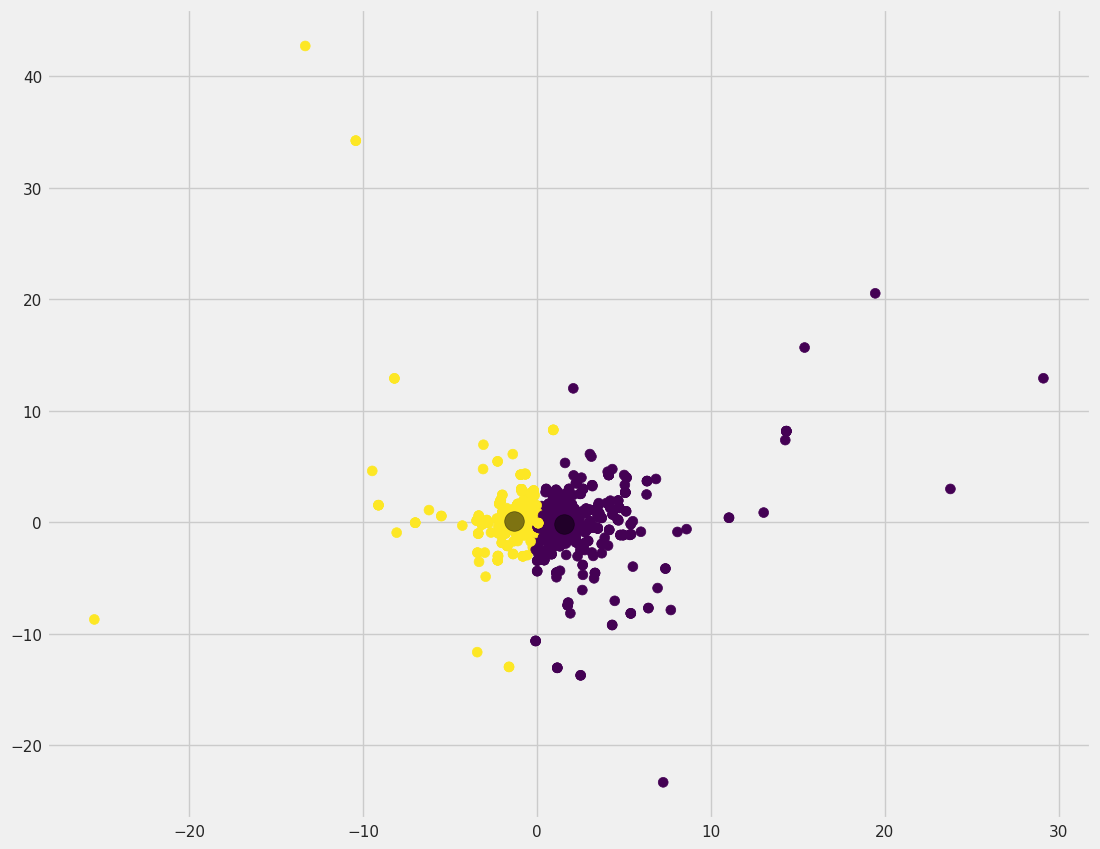

In [ ]:
# plotting clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
num_of_clusters = 6

#intialize kmeans
kmeans = KMeans(
    init="random",
    n_clusters=num_of_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

#fit kmeans
kmeans.fit(X_pca)

##cluster quality measure
# The lowest SSE value
kmeans.inertia_

6769.164163602684

##### Elbow Method

In [ ]:
# Elbow method
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

In [ ]:
print(sse)

[24684.555173252884, 19324.301336253295, 14873.465697590582, 11674.198564056627, 8792.233040436431, 6769.164163602684, 5925.069789673292, 5160.705283067766, 4554.51827686408, 4218.88844570077]


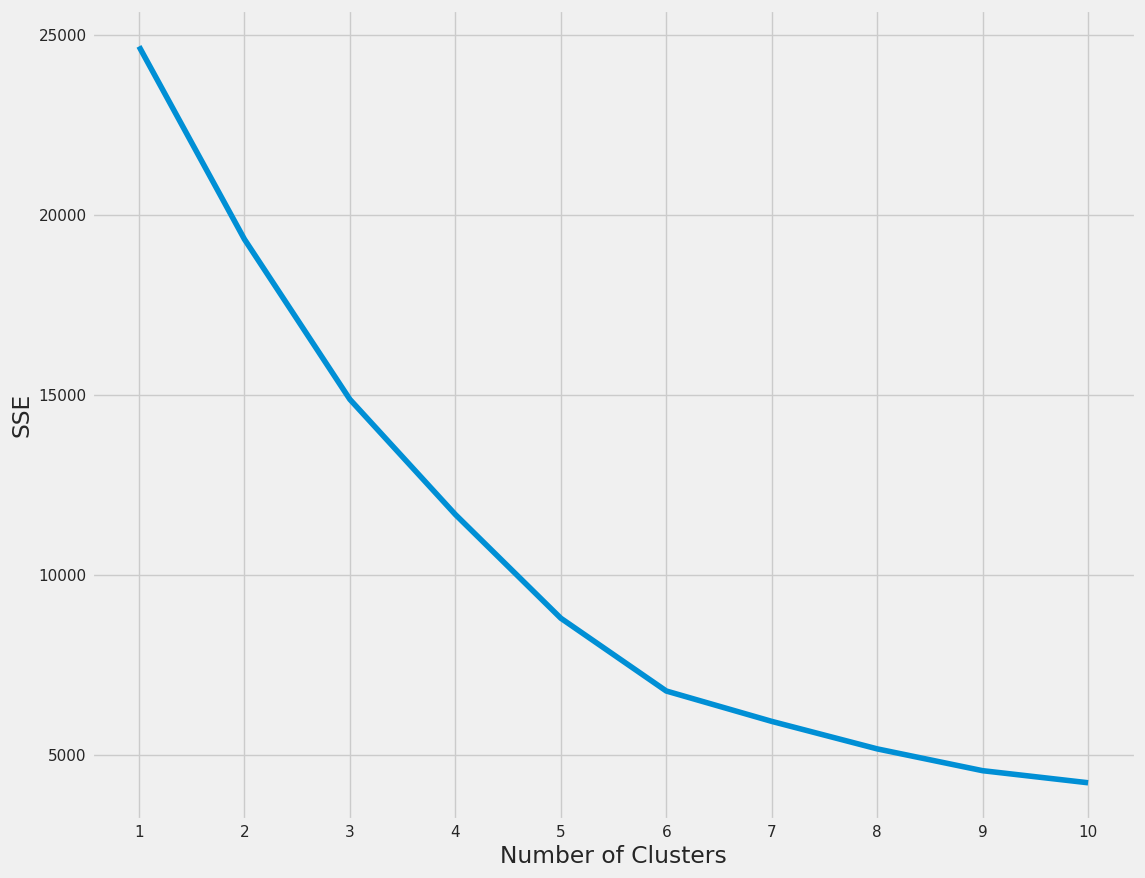

In [ ]:
# plotting elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

##### Silhouette Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have the data stored in X_pca

# Define the range of possible cluster numbers
min_clusters = 2
max_clusters = 10

best_cluster_num = None
best_silhouette_avg = -1

# Iterate over different numbers of clusters
for num_clusters in range(min_clusters, max_clusters + 1):
    # Initialize K-means with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Fit K-means to the data
    kmeans.fit(X_pca)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

    # Print the silhouette score for the current number of clusters
    print(f"Number of clusters: {num_clusters}, Silhouette score: {silhouette_avg}")

    # Update the best silhouette score and number of clusters if necessary
    if silhouette_avg > best_silhouette_avg:
        best_silhouette_avg = silhouette_avg
        best_cluster_num = num_clusters

# Print the best number of clusters based on the silhouette score
print(f"Best number of clusters: {best_cluster_num}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 2, Silhouette score: 0.42204663387727526
Number of clusters: 3, Silhouette score: 0.4402695284641748


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 4, Silhouette score: 0.4444081766502444
Number of clusters: 5, Silhouette score: 0.4721901920345672


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 6, Silhouette score: 0.49377597544508617
Number of clusters: 7, Silhouette score: 0.49962231065049173


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 8, Silhouette score: 0.517105273530502
Number of clusters: 9, Silhouette score: 0.5239578113860167
Number of clusters: 10, Silhouette score: 0.43805035039677587
Best number of clusters: 9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### Tracking Vaccine Type Index

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
toddler_SAE_subset['Cluster'] = cluster_labels

<ipython-input-133-067fad122ff4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toddler_SAE_subset['Cluster'] = cluster_labels


In [ ]:
# Create a new dataframe to store vaccine type, cluster label, and symptoms
vaccine_cluster_symptoms_df = pd.DataFrame({'VAX_TYPE': toddler_SAE_subset['VAX_TYPE'], 'Cluster': cluster_labels})
for col in symptom_columns:
    vaccine_cluster_symptoms_df[col] = toddler_SAE_subset[col]

# Group the dataframe by vaccine type and collect the indices and symptoms of each group
grouped = vaccine_cluster_symptoms_df.groupby(['VAX_TYPE', 'Cluster'])

# Print the vaccine types, cluster indices, and symptoms for each cluster
for (vax_type, cluster), group in grouped:
    print("Vaccine Type:", vax_type)
    print("Cluster:", cluster)
    print("Cluster Indices:", group.index.tolist())
    print("Symptoms:")
    symptoms = group[symptom_columns].values.tolist()
    symptoms_without_nan = [[symptom for symptom in symptom_list if str(symptom) != 'nan'] for symptom_list in symptoms]
    print(symptoms_without_nan)
    print()

Vaccine Type: 6VAX-F
Cluster: 0
Cluster Indices: [103996]
Symptoms:
[['anaemia', 'b precursor type acute leukaemia', 'body temperature', 'diarrhoea', 'gait disturbance']]

Vaccine Type: 6VAX-F
Cluster: 3
Cluster Indices: [103999]
Symptoms:
[['lethargy', 'malaise', 'pancytopenia']]

Vaccine Type: COVID19
Cluster: 0
Cluster Indices: [146323, 146324, 146325, 146326, 146329, 146330, 146874, 150070, 150071, 150130, 151379, 153223, 154414, 154415, 158835, 159013, 159407, 159408, 159411, 159412, 159499, 159732, 159733, 159734, 159742, 160131, 160133, 160452, 161322, 161323, 161324, 161598, 161599, 161910, 164866, 166027, 166028, 166029, 166031, 167819, 168850, 168851, 168853, 168854, 169998, 169999, 170000, 170001, 170194, 171355, 171356, 172206, 172236, 172237, 175121, 175122, 175682, 175683, 176116, 176117, 176174, 176747, 179911, 179912, 179913, 179914, 179915, 179916, 179917, 179919, 181043, 181044, 181045, 181046, 181047, 181048, 183705, 183706, 188067, 188273, 189480, 189481, 189482, 18

In [ ]:
import csv

# Assuming you have the original dataframe 'df' containing the vaccine types and symptom columns

# Create a new dataframe to store vaccine type, cluster label, and symptoms
vaccine_cluster_symptoms_df = pd.DataFrame({'VAX_TYPE': toddler_SAE_subset['VAX_TYPE'], 'Cluster': cluster_labels})
for col in symptom_columns:
    vaccine_cluster_symptoms_df[col] = toddler_SAE_subset[col]

# Group the dataframe by vaccine type and collect the indices and symptoms of each group
grouped = vaccine_cluster_symptoms_df.groupby(['VAX_TYPE', 'Cluster'])

# Prepare the data to be saved
output_data = []
for (vax_type, cluster), group in grouped:
    indices = group.index.tolist()
    symptoms = group[symptom_columns].values.tolist()
    symptoms_without_nan = [[symptom for symptom in symptom_list if str(symptom) != 'nan'] for symptom_list in symptoms]
    output_data.append([vax_type, cluster, indices, symptoms_without_nan])

# Save the data to a CSV file
output_file = '/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/toddler_SAE_cluster_output.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Vaccine Type', 'Cluster', 'Indices', 'Symptoms'])
    for data_row in output_data:
        writer.writerow(data_row)

#### Child Subset

In [ ]:
child_SAE_subset = child_subset[child_subset['HOSPITAL'] == 1]
child_nonSAE_subset = child_subset[child_subset['HOSPITAL'] == 0]

In [ ]:
#child_symptom_data = child_subset[symptom_columns]
#child_symptom_data = child_SAE_subset[symptom_columns]
child_symptom_data = child_nonSAE_subset[symptom_columns]

In [ ]:
# Replace 'no adverse event' with NaN
child_symptom_data[child_symptom_data == 'no adverse event'] = np.nan


<ipython-input-81-3688378acda2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_symptom_data[child_symptom_data == 'no adverse event'] = np.nan
<ipython-input-81-3688378acda2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_symptom_data[child_symptom_data == 'no adverse event'] = np.nan


In [ ]:
child_symptom_data.fillna('')
child_symptom_data.replace(np.nan, "", inplace=True)

<ipython-input-82-5f6aaf36c954>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_symptom_data.replace(np.nan, "", inplace=True)


In [ ]:
child_symptom_data_encoded = pd.get_dummies(child_symptom_data, columns=symptom_columns)


In [ ]:
child_vax_data = child_nonSAE_subset[vax_type_column]
vax_type_encoded = pd.get_dummies(child_vax_data, columns=vax_type_column)


In [ ]:
X_df = child_symptom_data_encoded
y_df = vax_type_encoded

In [ ]:
# Scaling X (Symptom data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

In [ ]:
# imports
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(X_pca)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 4.12034349,  0.05777226],
       [-1.1047858 , -0.01549045]])

In [ ]:
# predicting using kmeans
y_kmeans = kmeans.predict(X_pca)


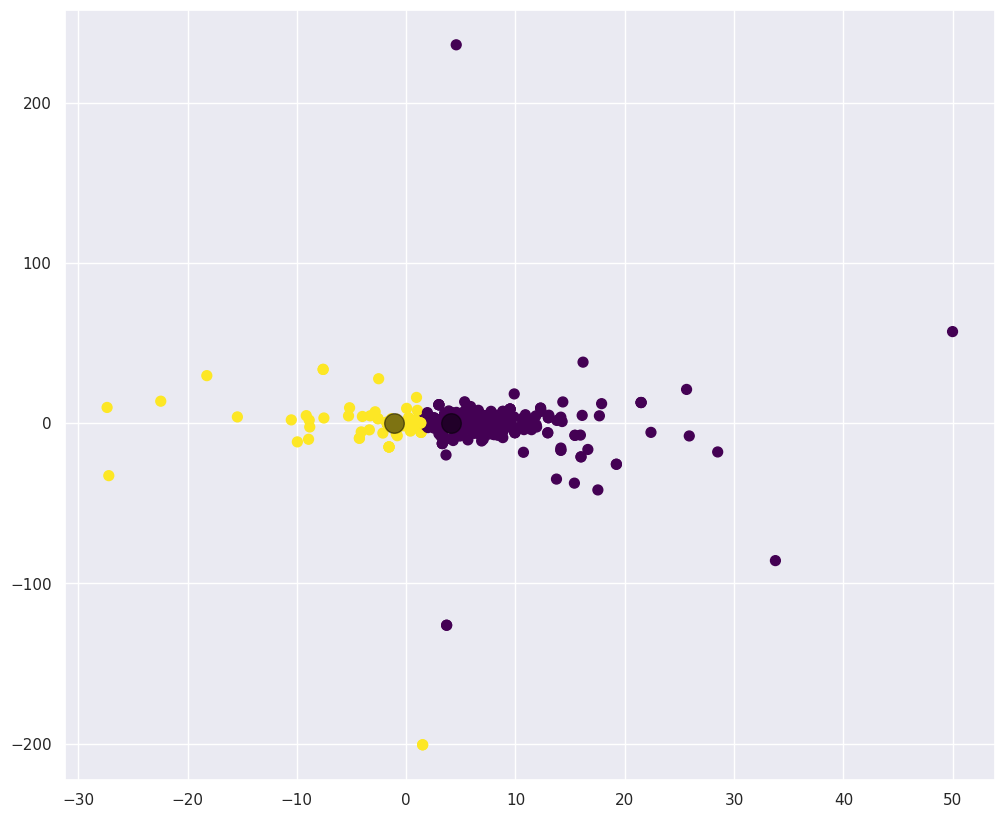

In [ ]:
# plotting clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
num_of_clusters = 4

#intialize kmeans
kmeans = KMeans(
    init="random",
    n_clusters=num_of_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

#fit kmeans
kmeans.fit(X_pca)

##cluster quality measure
# The lowest SSE value
kmeans.inertia_

179899.47305371118

##### Elbow Method

In [ ]:
# Elbow method
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

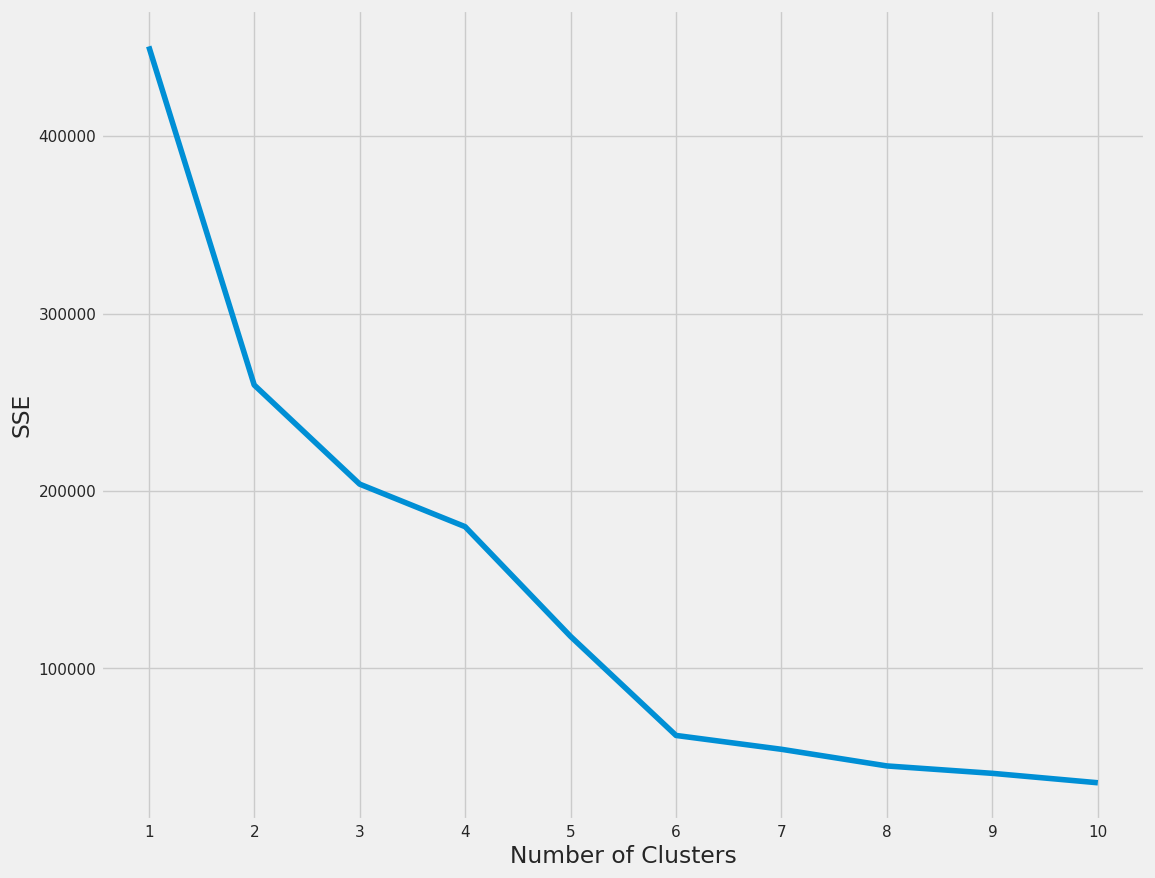

In [ ]:
# plotting elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

##### Silhouette Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have the data stored in X_pca

# Define the range of possible cluster numbers
min_clusters = 2
max_clusters = 10

best_cluster_num = None
best_silhouette_avg = -1

# Iterate over different numbers of clusters
for num_clusters in range(min_clusters, max_clusters + 1):
    # Initialize K-means with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Fit K-means to the data
    kmeans.fit(X_pca)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

    # Print the silhouette score for the current number of clusters
    print(f"Number of clusters: {num_clusters}, Silhouette score: {silhouette_avg}")

    # Update the best silhouette score and number of clusters if necessary
    if silhouette_avg > best_silhouette_avg:
        best_silhouette_avg = silhouette_avg
        best_cluster_num = num_clusters

# Print the best number of clusters based on the silhouette score
print(f"Best number of clusters: {best_cluster_num}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 2, Silhouette score: 0.7714041826242425


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 3, Silhouette score: 0.7736859226282506


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 4, Silhouette score: 0.7739816419947346


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 5, Silhouette score: 0.7149113968864447


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 6, Silhouette score: 0.7171932951014529


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 7, Silhouette score: 0.7173206062966524


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 8, Silhouette score: 0.7195946242814079


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 9, Silhouette score: 0.6900832661228322


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 10, Silhouette score: 0.6736418370655675
Best number of clusters: 4


##### Tracking Vaccine Type Index

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
child_nonSAE_subset['Cluster'] = cluster_labels

<ipython-input-99-2ddd18c2ecae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_nonSAE_subset['Cluster'] = cluster_labels


In [ ]:
# Create a new dataframe to store vaccine type, cluster label, and symptoms
vaccine_cluster_symptoms_df = pd.DataFrame({'VAX_TYPE': child_nonSAE_subset['VAX_TYPE'], 'Cluster': cluster_labels})
for col in symptom_columns:
    vaccine_cluster_symptoms_df[col] = child_nonSAE_subset[col]

# Group the dataframe by vaccine type and collect the indices and symptoms of each group
grouped = vaccine_cluster_symptoms_df.groupby(['VAX_TYPE', 'Cluster'])

# Print the vaccine types, cluster indices, and symptoms for each cluster
for (vax_type, cluster), group in grouped:
    print("Vaccine Type:", vax_type)
    print("Cluster:", cluster)
    print("Cluster Indices:", group.index.tolist())
    print("Symptoms:")
    symptoms = group[symptom_columns].values.tolist()
    symptoms_without_nan = [[symptom for symptom in symptom_list if str(symptom) != 'nan'] for symptom_list in symptoms]
    print(symptoms_without_nan)
    print()

Vaccine Type: COVID19
Cluster: 0
Cluster Indices: [86566, 95822, 95823, 98059, 100641, 100642, 101855, 103539, 106010, 106383, 106709, 106817, 106899, 107292, 107505, 107521, 107985, 108053, 108182, 108366, 108430, 109540, 109579, 109607, 109718, 110124, 110245, 110311, 110388, 110395, 110465, 110488, 110888, 110924, 110936, 111049, 111100, 111363, 111384, 111445, 111501, 111578, 111733, 111964, 112005, 112294, 112320, 112399, 112566, 112765, 112766, 112807, 112917, 112927, 113132, 113163, 113208, 113437, 113609, 113628, 113681, 113957, 113995, 114147, 114245, 114313, 114494, 114567, 114663, 114754, 115010, 115011, 115186, 115284, 115448, 115509, 115522, 115691, 115696, 115699, 115814, 115847, 115859, 116325, 116340, 116361, 116375, 116574, 116853, 116920, 116940, 117080, 117161, 117300, 117301, 117374, 117699, 117810, 117912, 118167, 118240, 118371, 118611, 118786, 118943, 118982, 119745, 119857, 120138, 120209, 120265, 120549, 120728, 120803, 120810, 120811, 120817, 120909, 121069, 1

In [ ]:
import csv

# Assuming you have the original dataframe 'df' containing the vaccine types and symptom columns

# Create a new dataframe to store vaccine type, cluster label, and symptoms
vaccine_cluster_symptoms_df = pd.DataFrame({'VAX_TYPE': child_nonSAE_subset['VAX_TYPE'], 'Cluster': cluster_labels})
for col in symptom_columns:
    vaccine_cluster_symptoms_df[col] = child_nonSAE_subset[col]

# Group the dataframe by vaccine type and collect the indices and symptoms of each group
grouped = vaccine_cluster_symptoms_df.groupby(['VAX_TYPE', 'Cluster'])

# Prepare the data to be saved
output_data = []
for (vax_type, cluster), group in grouped:
    indices = group.index.tolist()
    symptoms = group[symptom_columns].values.tolist()
    symptoms_without_nan = [[symptom for symptom in symptom_list if str(symptom) != 'nan'] for symptom_list in symptoms]
    output_data.append([vax_type, cluster, indices, symptoms_without_nan])

# Save the data to a CSV file
output_file = '/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/child_nonSAE_cluster_output.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Vaccine Type', 'Cluster', 'Indices', 'Symptoms'])
    for data_row in output_data:
        writer.writerow(data_row)

#### Adolescent Subset

In [ ]:
adolescent_SAE_subset = adolescent_subset[adolescent_subset['HOSPITAL'] == 1]
adolescent_nonSAE_subset = adolescent_subset[adolescent_subset['HOSPITAL'] == 0]

In [ ]:
#adolescent_symptom_data = adolescent_subset[symptom_columns]
adolescent_symptom_data = adolescent_SAE_subset[symptom_columns]
#adolescent_symptom_data = adolescent_nonSAE_subset[symptom_columns]

In [ ]:
# Replace 'no adverse event' with NaN
adolescent_symptom_data[adolescent_symptom_data == 'no adverse event'] = np.nan


<ipython-input-79-f29ef2e25793>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adolescent_symptom_data[adolescent_symptom_data == 'no adverse event'] = np.nan
<ipython-input-79-f29ef2e25793>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adolescent_symptom_data[adolescent_symptom_data == 'no adverse event'] = np.nan


In [ ]:
adolescent_symptom_data.fillna('')
adolescent_symptom_data.replace(np.nan, "", inplace=True)

<ipython-input-80-108d76a1342e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adolescent_symptom_data.replace(np.nan, "", inplace=True)


In [ ]:
adolescent_symptom_data_encoded = pd.get_dummies(adolescent_symptom_data, columns=symptom_columns)


In [ ]:
adolescent_vax_data = adolescent_SAE_subset[vax_type_column]
vax_type_encoded = pd.get_dummies(adolescent_vax_data, columns=vax_type_column)


In [ ]:
X_df = adolescent_symptom_data_encoded
y_df = vax_type_encoded

In [ ]:
# Scaling X (Symptom data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

In [ ]:
# imports
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(X_pca)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-2.18524269,  0.07131146],
       [ 1.31470772, -0.04290312]])

In [ ]:
# predicting using kmeans
y_kmeans = kmeans.predict(X_pca)


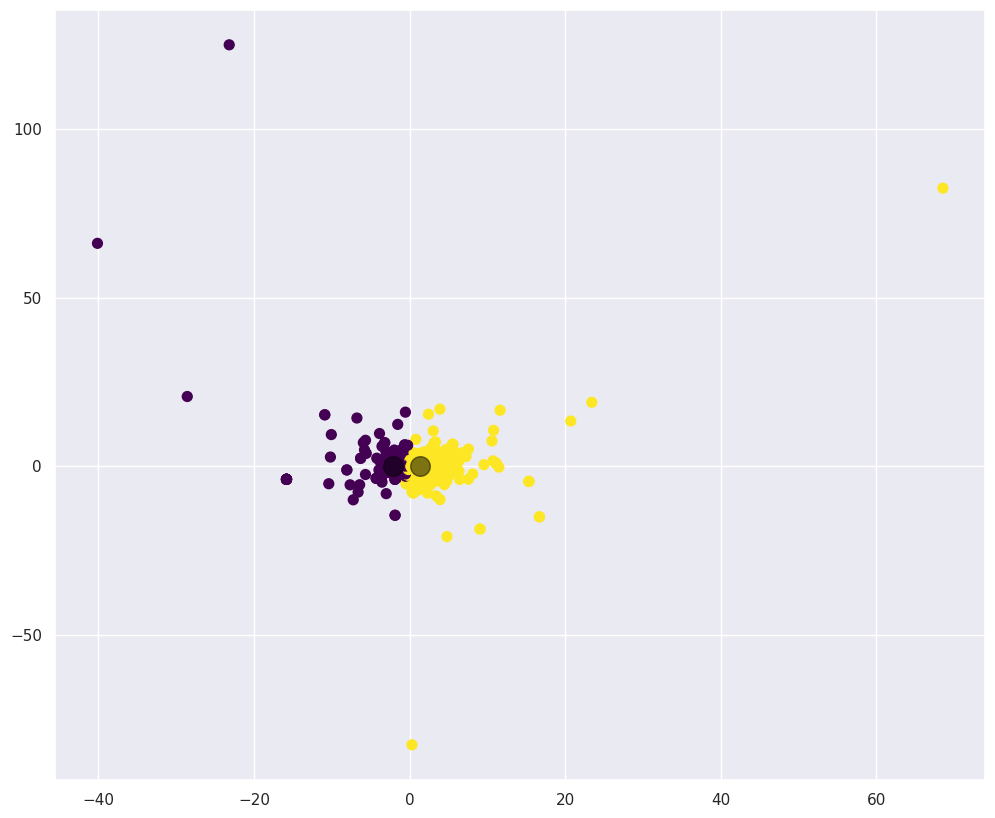

In [ ]:
# plotting clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
num_of_clusters = 4

#intialize kmeans
kmeans = KMeans(
    init="random",
    n_clusters=num_of_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

#fit kmeans
kmeans.fit(X_pca)

##cluster quality measure
# The lowest SSE value
kmeans.inertia_

36243.092480126106

##### Elbow Method

In [ ]:
# Elbow method
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

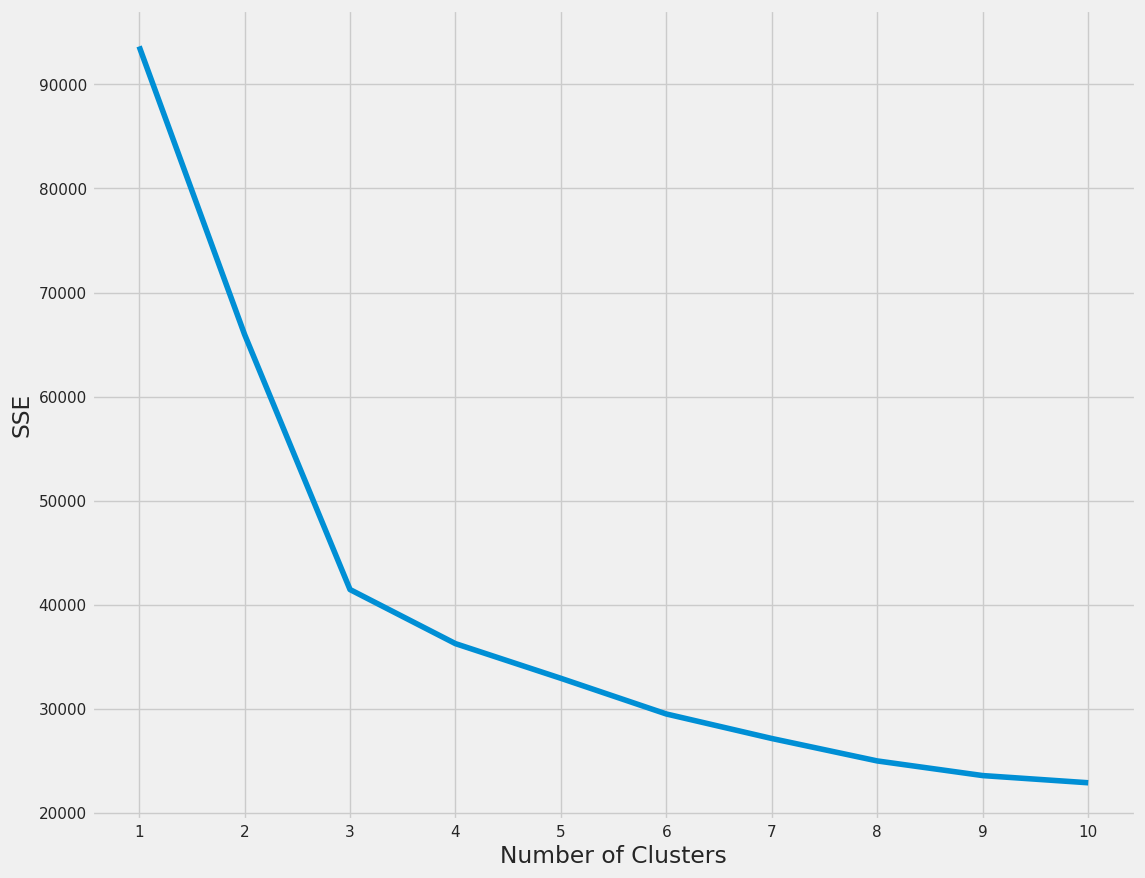

In [ ]:
# plotting elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

##### Silhouette Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have the data stored in X_pca

# Define the range of possible cluster numbers
min_clusters = 2
max_clusters = 10

best_cluster_num = None
best_silhouette_avg = -1

# Iterate over different numbers of clusters
for num_clusters in range(min_clusters, max_clusters + 1):
    # Initialize K-means with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Fit K-means to the data
    kmeans.fit(X_pca)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

    # Print the silhouette score for the current number of clusters
    print(f"Number of clusters: {num_clusters}, Silhouette score: {silhouette_avg}")

    # Update the best silhouette score and number of clusters if necessary
    if silhouette_avg > best_silhouette_avg:
        best_silhouette_avg = silhouette_avg
        best_cluster_num = num_clusters

# Print the best number of clusters based on the silhouette score
print(f"Best number of clusters: {best_cluster_num}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 2, Silhouette score: 0.6022497134887388


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 3, Silhouette score: 0.606365594473201


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 4, Silhouette score: 0.6083610535234106


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 5, Silhouette score: 0.608280675258025


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 6, Silhouette score: 0.5813032862546109


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 7, Silhouette score: 0.6172696333650121


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 8, Silhouette score: 0.5318382622610248


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 9, Silhouette score: 0.5309660388849342


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 10, Silhouette score: 0.5392639888933138
Best number of clusters: 7


##### Tracking Vaccine Type Index

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
adolescent_SAE_subset['Cluster'] = cluster_labels

<ipython-input-97-4d9df033f663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adolescent_SAE_subset['Cluster'] = cluster_labels


In [ ]:
# Create a new dataframe to store vaccine type, cluster label, and symptoms
vaccine_cluster_symptoms_df = pd.DataFrame({'VAX_TYPE': adolescent_SAE_subset['VAX_TYPE'], 'Cluster': cluster_labels})
for col in symptom_columns:
    vaccine_cluster_symptoms_df[col] = adolescent_SAE_subset[col]

# Group the dataframe by vaccine type and collect the indices and symptoms of each group
grouped = vaccine_cluster_symptoms_df.groupby(['VAX_TYPE', 'Cluster'])

# Print the vaccine types, cluster indices, and symptoms for each cluster
for (vax_type, cluster), group in grouped:
    print("Vaccine Type:", vax_type)
    print("Cluster:", cluster)
    print("Cluster Indices:", group.index.tolist())
    print("Symptoms:")
    symptoms = group[symptom_columns].values.tolist()
    symptoms_without_nan = [[symptom for symptom in symptom_list if str(symptom) != 'nan'] for symptom_list in symptoms]
    print(symptoms_without_nan)
    print()

Vaccine Type: COVID19
Cluster: 0
Cluster Indices: [89147, 90193, 90260, 92015, 95432, 96131, 96134, 96136, 97475, 97980, 98157, 101398, 101399, 101406, 101408, 102120, 102121, 103513, 104399, 104400, 104406, 106075, 106313, 106567, 107722, 107994, 108504, 108849, 108850, 108851, 109744, 109972, 109973, 110561, 111196, 111197, 111267, 112067, 112098, 112102, 113200, 114064, 114065, 114121, 114220, 114950, 114952, 115376, 115474, 115477, 115488, 115773, 115817, 116013, 116014, 116016, 116296, 116307, 116429, 116477, 116482, 116807, 116808, 116868, 116870, 116978, 117166, 117433, 117434, 117435, 117436, 117451, 117452, 117986, 118405, 118588, 118792, 118796, 118829, 118835, 120435, 120436, 121238, 121290, 121291, 121292, 121293, 121304, 121305, 121306, 121307, 122098, 122099, 122102, 123595, 123599, 124093, 124094, 124286, 124287, 124491, 125288, 125289, 125822, 126436, 126974, 127467, 127919, 128755, 129736, 129737, 129746, 129747, 132297, 132299, 134187, 134256, 134409, 134422, 134455, 

In [ ]:
import csv

# Assuming you have the original dataframe 'df' containing the vaccine types and symptom columns

# Create a new dataframe to store vaccine type, cluster label, and symptoms
vaccine_cluster_symptoms_df = pd.DataFrame({'VAX_TYPE': adolescent_SAE_subset['VAX_TYPE'], 'Cluster': cluster_labels})
for col in symptom_columns:
    vaccine_cluster_symptoms_df[col] = adolescent_SAE_subset[col]

# Group the dataframe by vaccine type and collect the indices and symptoms of each group
grouped = vaccine_cluster_symptoms_df.groupby(['VAX_TYPE', 'Cluster'])

# Prepare the data to be saved
output_data = []
for (vax_type, cluster), group in grouped:
    indices = group.index.tolist()
    symptoms = group[symptom_columns].values.tolist()
    symptoms_without_nan = [[symptom for symptom in symptom_list if str(symptom) != 'nan'] for symptom_list in symptoms]
    output_data.append([vax_type, cluster, indices, symptoms_without_nan])

# Save the data to a CSV file
output_file = '/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/adolescent_SAE_cluster_output.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Vaccine Type', 'Cluster', 'Indices', 'Symptoms'])
    for data_row in output_data:
        writer.writerow(data_row)

###### Batched Run

In [ ]:
adolescent_nonSAE_subset.shape

(88611, 31)

In [ ]:
import csv
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have the original dataframe 'df'

# Split the data into batches (subsets)
batch_size = 1000  # Number of samples per batch
num_batches = len(adolescent_nonSAE_subset) // batch_size  # Number of batches

# Prepare a list to accumulate the output data from all batches
output_data_all = []

for batch_index in range(num_batches):
    # Get the current batch range
    start_index = batch_index * batch_size
    end_index = start_index + batch_size

    # Get the current batch subset of the data
    batch_df = adolescent_nonSAE_subset.iloc[start_index:end_index]

    # Extract the necessary columns for symptoms and vaccine types
    adolescent_symptom_data = batch_df[symptom_columns]
    adolescent_vax_data = batch_df[vax_type_column]

    # Perform one-hot encoding on the symptom data
    adolescent_symptom_data_encoded = pd.get_dummies(adolescent_symptom_data, columns=symptom_columns)

    # Perform one-hot encoding on the vaccine type data
    vax_type_encoded = pd.get_dummies(adolescent_vax_data, columns=[vax_type_column])

    # Prepare X (symptom data) and y (vaccine type) for clustering
    X_df = adolescent_symptom_data_encoded
    y_df = vax_type_encoded

    # Scaling X (Symptom data)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_df)

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # K-means clustering
    num_of_clusters = 4
    kmeans = KMeans(
        init="random",
        n_clusters=num_of_clusters,
        n_init=10,
        max_iter=300,
        random_state=42
    )
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_

    # Append the cluster labels to the batch subset
    batch_df['Cluster'] = cluster_labels

    # Create a new dataframe to store vaccine type, cluster label, and symptoms
    vaccine_cluster_symptoms_df = pd.DataFrame({'VAX_TYPE': batch_df['VAX_TYPE'], 'Cluster': cluster_labels})
    for col in symptom_columns:
        vaccine_cluster_symptoms_df[col] = batch_df[col]

    # Group the dataframe by vaccine type and collect the indices and symptoms of each group
    grouped = vaccine_cluster_symptoms_df.groupby(['VAX_TYPE', 'Cluster'])

    # Prepare the data to be saved
    output_data = []
    for (vax_type, cluster), group in grouped:
        indices = group.index.tolist()
        symptoms = group[symptom_columns].values.tolist()
        symptoms_without_nan = [[symptom for symptom in symptom_list if str(symptom) != 'nan'] for symptom_list in symptoms]
        output_data.append([vax_type, cluster, indices, symptoms_without_nan])

    # Accumulate the output data from the current batch
    output_data_all.extend(output_data)

# Save the data from all batches to a single CSV file
output_file = '/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/adolescent_nonSAE_cluster_output.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer


<ipython-input-90-b2b6ec26e353>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Cluster'] = cluster_labels
<ipython-input-90-b2b6ec26e353>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Cluster'] = cluster_labels
<ipython-input-90-b2b6ec26e353>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g